### Data Preprocessing

In [1]:
import pandas as pd

# 重新加载清理后的两个文件（CNRDS 和 CSMAR）
file1 = "CSMAR.xlsx"
file2 = "CNRDS.xlsx"

df1 = pd.read_excel(file1, sheet_name='模板')
df2 = pd.read_excel(file2, sheet_name='上市公司ESG评级')

# --- 清理 CNRDS ---
df1_clean = df1.iloc[2:].copy()
df1_clean.columns = df1.iloc[0]
df1_clean = df1_clean.dropna(subset=["股票代码"])
df1_clean = df1_clean.rename(columns={
    "股票代码": "Code",
    "股票简称": "Name",
    "评级年份": "Year",
    "评级日期":"Date",
    "公司全称": "FullName",
    "所属指数名称": "IndexName",
    "成分股标识": "ConstituentFlag",
    "证监会行业": "CSMAR_Industry",
    "融绿一级行业": "CSMAR_Industry_1",
    "融绿二级行业": "CSMAR_Industry_2",
    "ESG总评分": "ESG_CSMAR",
    "E评分": "E_CSMAR",
    "S评分": "S_CSMAR",
    "G评分": "G_CSMAR",
    "特殊说明": "SpecialNotes",
    "ESG风险评估评分":"ESGRiskScore",
    "ESG管理评分":"ESGManagementscore"

})

# --- 清理 CSMAR ---
df2_clean = df2.iloc[1:].copy()
df2_clean.columns = df2.iloc[0]
df2_clean = df2_clean.dropna(subset=["股票代码"])
df2_clean = df2_clean.rename(columns={
    "股票代码": "Code",
    "公司简称": "Name",
    "会计年度": "Year",
    "ESG得分": "ESG_CNRDS",
    "E得分": "E_CNRDS",
    "S得分": "S_CNRDS",
    "G得分": "G_CNRDS",
    "ESG排名": "ESG_CNRDS_rank",
    "E排名": "E_CNRDS_rank",
    "S排名": "S_CNRDS_rank",
    "G排名": "G_CNRDS_rank",
})

# 转换类型
for df in [df1_clean, df2_clean]:
    df["Year"] = df["Year"].astype(int)
    for col in ["ESG_CNRDS", "E_CNRDS", "S_CNRDS", "G_CNRDS",
                "ESG_CSMAR", "E_CSMAR", "S_CSMAR", "G_CSMAR"]:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors="coerce")

# 合并（外连接）
merged_full = pd.merge(df1_clean, df2_clean, on=["Code", "Year","Name"], how="outer")

# --- 保留双系统都有数据的样本 ---
merged_matched = merged_full.dropna(subset=["ESG_CNRDS", "ESG_CSMAR"])

# 输出样本量统计
num_rows = len(merged_matched)
num_companies = merged_matched["Code"].nunique()

# merged_matched.head(), num_rows, num_companies


In [2]:
import pandas as pd

# 读取文件（用你前面生成的合并文件）
df = merged_matched

# 行业映射字典（中→英，学术风格）
industry_map = {
    # === 原基础映射 ===
    "资本市场服务": "Capital Market Services",
    "银行业": "Banking",
    "保险业": "Insurance",
    "证券业": "Securities",
    "金属制品业": "Manufacture of Metal Products",
    "运输设备制造业": "Manufacture of Transport Equipment",
    "铁路、船舶、航空航天和其他运输设备制造业": "Manufacture of Railway, Ship, Aerospace and Other Transport Equipment",
    "原材料加工制造业": "Raw Materials Manufacturing",
    "化学原料及化学制品制造业": "Manufacture of Chemicals and Chemical Products",
    "金融业": "Finance Industry",
    "非银金融业": "Non-bank Financial Industry",
    "制造业": "Manufacturing",
    "批发和零售业": "Wholesale and Retail Trade",
    "房地产业": "Real Estate",
    "电力、热力、燃气及水生产和供应业": "Electricity, Heat, Gas and Water Supply",
    "采矿业": "Mining Industry",
    "农、林、牧、渔业": "Agriculture, Forestry, Animal Husbandry and Fishery",
    "软件和信息技术服务业": "Software and Information Technology Services",
    "信息传输、软件和信息技术服务业": "Information Transmission, Software and IT Services",
    "交通运输、仓储和邮政业": "Transportation, Storage and Postal Services",
    "文化、体育和娱乐业": "Culture, Sports and Entertainment",
    "教育": "Education",
    "卫生和社会工作": "Health and Social Work",
    "科学研究和技术服务业": "Scientific Research and Technical Services",
    "租赁和商务服务业": "Leasing and Business Services",
    "公共管理、社会保障和社会组织": "Public Administration, Social Security and Organizations",

    # === 扩展未翻译行业 ===
    "货币金融服务": "Monetary Financial Services",
    "综合": "Comprehensive",
    "电力、热力生产和供应业": "Production and Supply of Electricity and Heat",
    "有色金属冶炼和压延加工业": "Smelting and Rolling of Nonferrous Metals",
    "黑色金属冶炼和压延加工业": "Smelting and Rolling of Ferrous Metals",
    "金属冶炼和压延加工业": "Smelting and Rolling of Metals",
    "商务服务业": "Business Services",
    "广播、电视、电影和影视录音制作业": "Radio, Television, Film and Audio-Video Production",
    "租赁业": "Leasing",
    "水的生产和供应业": "Water Production and Supply",
    "石油加工、炼焦及核燃料加工业": "Processing of Petroleum, Coking and Nuclear Fuel",
    "非金属矿物制品业": "Manufacture of Non-metallic Mineral Products",
    "农副食品加工业": "Processing of Agricultural and Sideline Food",
    "电信、广播电视和卫星传输服务": "Telecommunications, Broadcasting and Satellite Transmission Services",
    "煤炭开采和洗选业": "Coal Mining and Washing",
    "土木工程建筑业": "Civil Engineering Construction",
    "零售业": "Retail Trade",
    "批发业": "Wholesale Trade",
    "道路运输业": "Road Transport",
    "铁路运输业": "Rail Transport",
    "航空运输业": "Air Transport",
    "水上运输业": "Water Transport",
    "邮政业": "Postal Services",
    "互联网和相关服务": "Internet and Related Services",
    "畜牧业": "Animal Husbandry",
    "造纸及纸制品业": "Manufacture of Paper and Paper Products",
    "生态保护和环境治理业": "Ecological Protection and Environmental Governance",
    "文化艺术业": "Culture and Arts",
    "石油和天然气开采业": "Extraction of Petroleum and Natural Gas",
    "建筑业": "Construction",
    "建筑业-土木工程建筑业": "Construction - Civil Engineering",
    "建筑装饰和其他建筑业": "Building Decoration and Other Construction",
    "开采辅助活动": "Support Activities for Mining",
    "新闻和出版业": "News and Publishing",
    "纺织服装、服饰业": "Textile, Apparel and Accessories",
    "纺织业": "Textile Industry",
    "有色金属矿采选业": "Nonferrous Metal Mining and Dressing",
    "黑色金属矿采选业": "Ferrous Metal Mining and Dressing",
    "燃气生产和供应业": "Gas Production and Supply",
    "食品与主要用品零售": "Food and Essential Goods Retail",
    "橡胶和塑料制品业": "Manufacture of Rubber and Plastic Products",
    "研究和试验发展": "Research and Experimental Development",
    "卫生": "Health",
    "农业": "Agriculture",
    "其他运输业和邮政业": "Other Transport and Postal Services",
    "水利、环境和公共设施管理业": "Water Conservancy, Environment and Public Facilities Management",
    "其他服务业": "Other Services",
    "（已退市）": "Delisted"
}


# 定义一个翻译函数
def translate_industry(value):
    if pd.isna(value):
        return None
    for k, v in industry_map.items():
        if k in str(value):
            return v
    return value  # 如果没找到匹配，就保留原文

# 新增英文列
df["CSMAR_Industry"] = df["CSMAR_Industry"].apply(translate_industry)
df["CSMAR_Industry_1"] = df["CSMAR_Industry_1"].apply(translate_industry)
df["CSMAR_Industry_2"] = df["CSMAR_Industry_2"].apply(translate_industry)
df = df.drop(columns=["评级", "ConstituentFlag", "IndexName"])

# # 导出新的文件
output_path = "ESG_with_Industry_English.xlsx"
df.to_excel(output_path, index=False)

print(df.head(10))


C:\Users\wanyi\AppData\Local\Temp\ipykernel_20800\955113702.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CSMAR_Industry"] = df["CSMAR_Industry"].apply(translate_industry)
C:\Users\wanyi\AppData\Local\Temp\ipykernel_20800\955113702.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CSMAR_Industry_1"] = df["CSMAR_Industry_1"].apply(translate_industry)
C:\Users\wanyi\AppData\Local\Temp\ipykernel_20800\955113702.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

0   Year        Date    Code  Name    FullName               CSMAR_Industry  \
8   2015  2015-06-30  000001  平安银行  平安银行股份有限公司  Monetary Financial Services   
9   2016  2016-06-30  000001  平安银行  平安银行股份有限公司  Monetary Financial Services   
10  2017  2017-06-30  000001  平安银行  平安银行股份有限公司  Monetary Financial Services   
11  2018  2018-06-30  000001  平安银行  平安银行股份有限公司  Monetary Financial Services   
12  2019  2019-06-30  000001  平安银行  平安银行股份有限公司  Monetary Financial Services   
13  2020  2020-06-30  000001  平安银行  平安银行股份有限公司             Finance Industry   
24  2015  2015-06-30  000002   万科A  万科企业股份有限公司                  Real Estate   
25  2016  2016-06-30  000002   万科A  万科企业股份有限公司                  Real Estate   
26  2017  2017-06-30  000002   万科A  万科企业股份有限公司                  Real Estate   
27  2018  2018-06-30  000002   万科A  万科企业股份有限公司                  Real Estate   

0   CSMAR_Industry_1 CSMAR_Industry_2  ESG_CSMAR  E_CSMAR  ...  ESGRiskScore  \
8   Finance Industry          Banking     49.875  

### General Paper Outline



### The Inherent Difference in Two Rating System


||CSMAR|CNRDS|
|----|----|----|
|Cover Range| Chinese Security Index 300| All A-share listed companies in China, excluding those that have been delisted|
|Data Source| Media, publicly available information|CNRDS platform, publicly available information| 
|Composition| 3 level I indicator, 14 key issues, 200 + ESG indicators from 700+ Data points, 51 industry specific model |3 level I indicator, 14 Level II indicators, 39 Level III indicators |
| Methodology | Bottom-up indicator aggregation model: From data to model | HP: Analytical Hierarchy Process. From alignment with International ESG Framework to data|
| Weights | 51 Industry Models (core indicators + secotr-specific indicators | Experts Rating Pairewise Comparison + Industry Adjustment | 

**CSMAR**: 
* Drive from data point: Drived from approximately 700 data points, 200 indicators was find. Hierachy into 14 key issues were build on 200 indicators. 
* Industry Differnce: Core Indicators + Sector Specfic Indicators 
    * The framework distinguishes between core indicators (applicable to all firms) and sector-specific indicators (tailored to industry characteristics).
    * 51 industry models were developed each with customized weights. 
* Scoring Mechanism: ESG Managemeng Score (positive scores) + ESG risk scores (potential risk) 
* Data Source: corporate annual reports, sustainability and CSR reports, official disclosures, regulatory announcements, and media coverage.

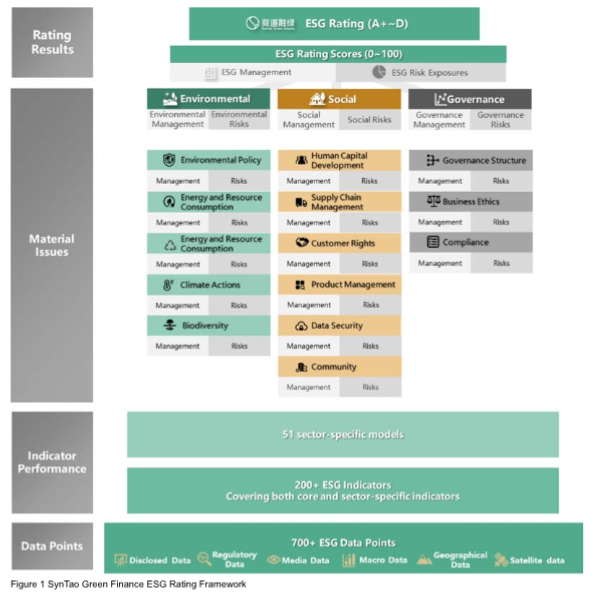

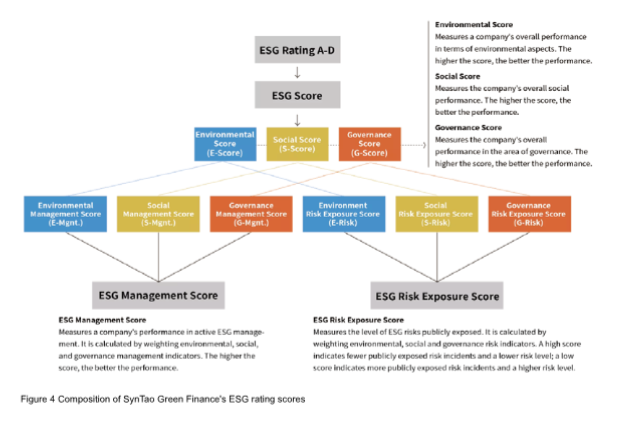
------
**CNRDS**
* Follow International Standard:  
    * Align with International Disclosure: It follows the international disclousre framework such as ISO 260000, GRI Standard, and SASB standard. 
    * Build upon and qantitaive and qualitie data. 
    * It includes 14 ESG Topics, 39 sub-indicators, 44 underlying variables, 
* Industry Differnce: 
    * Expert doing pairwise comparison -> Scoring Matrix > Consistency Test > Result 
    * Also applied industry-specific standaridzation. 
    * Adjust based on CSRS industry classification (19 Level I Industry) 
* Scoring Mechanism: 
    * Expert doing pairwise comparison -> Scoring Matrix > Consistency Test 
* Data Source: corporate annual and CSR/ESG reports, CNRDS financial and patent databases, media reports, and regulatory filings

**CSMAR v.s. CNSRD Level II Topic Difference**  
    
| Dimension | **CSMAR (SynTao Green Finance)** | **CNRDS ESG-R** |
|------------|----------------------------------|------------------|
| **Environmental (E)** | - Environmental Policy ✅ <br> - Energy and Resource Consumption ✅ <br> - Pollutant Discharge  <br> - Climate Actions  <br> - Biodiversity ✅| - Climate Change  <br> - Pollution Control  <br> - Circular Economy ✅ <br> - Environmental Risk |
| **Social (S)** | - Human Capital Development ✅ <br> - Customer Rights ✅ <br> - Supply Chain Management ✅ <br> - Data Security ✅ <br> - Product Management  <br> - Community | - Employee Rights  <br> - Product Responsibility  <br> - Social Contribution ✅ <br> - Research and Innovation ✅ <br> - Health and Safety✅  <br> - Social Risk |
| **Governance (G)** | - Governance Structure  <br> - Business Ethics ✅ <br> - Compliance ✅| - Financial Performance ✅<br> - Corporate Governance  <br> - Information Disclosure ✅ <br> - Governance Risk |


✅: This topics only includes in this Rating System. 
While both standards cover core E, S, and G dimensions, CSMAR places a distinct emphasis on policy and foundational aspects, notably featuring:
* Environmental Policy
* Energy and Resource Consumption
* Biodiversity
* Various social pillars like Human Capital Development, Customer Rights, Supply Chain Management, and Data Security
* Governance aspects of Business Ethics and Compliance

In contrast, the CNRDS ESG-R standard appears more focused on tangible impacts, performance, and risk management. Its unique elements include:
* Specific environmental themes like Circular Economy
* Social factors such as Social Contribution, Research and Innovation, and Health and Safety
* Governance metrics directly tied to Financial Performance and Information Disclosure
* A pronounced emphasis on risk across all dimensions, explicitly listing Environmental Risk, Social Risk, and Governance Risk

In essence, CSMAR seems to prioritize the existence of policies and management systems, whereas CNRDS ESG-R leans towards evaluating concrete outcomes, performance results, and the management of associated risks.


### Standardized the Score: 

#### Method 1: Percentile 
* Standardize using Percentile → Show differences at the "ranking level"

In [9]:
import pandas as pd

# Standardized According to Percentile 

# Percentile for Different Years
df["CNRDS_ESG_pct"] = df.groupby("Year")["ESG_CNRDS"].rank(pct=True)
df["CSMAR_ESG_pct"] = df.groupby("Year")["ESG_CSMAR"].rank(pct=True)
df["CNRDS_E_pct"] = df.groupby("Year")["E_CNRDS"].rank(pct=True)
df["CSMAR_E_pct"] = df.groupby("Year")["E_CSMAR"].rank(pct=True)
df["CNRDS_S_pct"] = df.groupby("Year")["S_CNRDS"].rank(pct=True)
df["CSMAR_S_pct"] = df.groupby("Year")["S_CSMAR"].rank(pct=True)
df["CNRDS_G_pct"] = df.groupby("Year")["G_CNRDS"].rank(pct=True)
df["CSMAR_G_pct"] = df.groupby("Year")["G_CSMAR"].rank(pct=True)


# Two Systems + Four Dimensions
def pct_rank(g, col):
    return g[col].rank(pct=True, method="average")

cols_map = {
    "CSMAR": {"ESG": "ESG_CSMAR", "E": "E_CSMAR", "S": "S_CSMAR", "G": "G_CSMAR"},
    "CNRDS": {"ESG": "ESG_CNRDS", "E": "E_CNRDS", "S": "S_CNRDS", "G": "G_CNRDS"},
}

# 1) Year + Indstury  percentile（Comparable Within Industsry）
for sys, m in cols_map.items():
    for dim, col in m.items():
        df[f"{sys}_{dim}_ind_pct"] = (
            df.groupby(["Year", "CSMAR_Industry_1"], group_keys=False)
              .apply(lambda g: pct_rank(g, col))
        )

# 2) Year percentile（Comparable Across Market）
for sys, m in cols_map.items():
    for dim, col in m.items():
        df[f"{sys}_{dim}_year_pct"] = df.groupby("Year")[col].rank(pct=True, method="average")

C:\Users\wanyi\AppData\Local\Temp\ipykernel_20800\3707477067.py:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: pct_rank(g, col))
C:\Users\wanyi\AppData\Local\Temp\ipykernel_20800\3707477067.py:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: pct_rank(g, col))
C:\Users\wanyi\AppData\Local\Temp\ipykernel_20800\3707477067.py:30: DeprecationWarning: DataFrameGroupBy.apply o

#### Method 2: Z-score
* Standardize using Z-score → Show differences at the "structural source" level


In [11]:
print(df.columns)

Index(['Year', 'Date', 'Code', 'Name', 'FullName', 'CSMAR_Industry',
       'CSMAR_Industry_1', 'CSMAR_Industry_2', 'ESG_CSMAR', 'E_CSMAR',
       'S_CSMAR', 'G_CSMAR', 'ESGManagementscore', 'ESGRiskScore',
       'SpecialNotes', 'ESG_CNRDS', 'ESG_CNRDS_rank', 'E_CNRDS',
       'E_CNRDS_rank', 'S_CNRDS', 'S_CNRDS_rank', 'G_CNRDS', 'G_CNRDS_rank',
       'CNRDS_ESG_pct', 'CSMAR_ESG_pct', 'CNRDS_E_pct', 'CSMAR_E_pct',
       'CNRDS_S_pct', 'CSMAR_S_pct', 'CNRDS_G_pct', 'CSMAR_G_pct',
       'CSMAR_ESG_ind_pct', 'CSMAR_E_ind_pct', 'CSMAR_S_ind_pct',
       'CSMAR_G_ind_pct', 'CNRDS_ESG_ind_pct', 'CNRDS_E_ind_pct',
       'CNRDS_S_ind_pct', 'CNRDS_G_ind_pct', 'CSMAR_ESG_year_pct',
       'CSMAR_E_year_pct', 'CSMAR_S_year_pct', 'CSMAR_G_year_pct',
       'CNRDS_ESG_year_pct', 'CNRDS_E_year_pct', 'CNRDS_S_year_pct',
       'CNRDS_G_year_pct', 'CNRDS_ESG_MM', 'CSMAR_ESG_MM', 'CNRDS_E_MM',
       'CSMAR_E_MM', 'CNRDS_S_MM', 'CSMAR_S_MM', 'CNRDS_G_MM', 'CSMAR_G_MM',
       'CSMAR_ESG_ind_MM', '

#### Method 3: Max - Min * 100
* Standardize using Z-score → Show differences at the "structural source" level


In [7]:
import pandas as pd

# Max-Min Standardization for Different Years
def max_min_standardize(g, col):
    return (g[col] - g[col].min()) / (g[col].max() - g[col].min())

# Max-Min Standardization for Different Years
df["CNRDS_ESG_MM"] = df.groupby("Year")["ESG_CNRDS"].transform(lambda x: (x - x.min()) / (x.max() - x.min()))
df["CSMAR_ESG_MM"] = df.groupby("Year")["ESG_CSMAR"].transform(lambda x: (x - x.min()) / (x.max() - x.min()))
df["CNRDS_E_MM"] = df.groupby("Year")["E_CNRDS"].transform(lambda x: (x - x.min()) / (x.max() - x.min()))
df["CSMAR_E_MM"] = df.groupby("Year")["E_CSMAR"].transform(lambda x: (x - x.min()) / (x.max() - x.min()))
df["CNRDS_S_MM"] = df.groupby("Year")["S_CNRDS"].transform(lambda x: (x - x.min()) / (x.max() - x.min()))
df["CSMAR_S_MM"] = df.groupby("Year")["S_CSMAR"].transform(lambda x: (x - x.min()) / (x.max() - x.min()))
df["CNRDS_G_MM"] = df.groupby("Year")["G_CNRDS"].transform(lambda x: (x - x.min()) / (x.max() - x.min()))
df["CSMAR_G_MM"] = df.groupby("Year")["G_CSMAR"].transform(lambda x: (x - x.min()) / (x.max() - x.min()))

# Two Systems + Four Dimensions
cols_map = {
    "CSMAR": {"ESG": "ESG_CSMAR", "E": "E_CSMAR", "S": "S_CSMAR", "G": "G_CSMAR"},
    "CNRDS": {"ESG": "ESG_CNRDS", "E": "E_CNRDS", "S": "S_CNRDS", "G": "G_CNRDS"},
}

# 1) Year + Industry Max-Min Standardization (Comparable Within Industry)
for sys, m in cols_map.items():
    for dim, col in m.items():
        df[f"{sys}_{dim}_ind_MM"] = (
            df.groupby(["Year", "CSMAR_Industry_1"], group_keys=False)
              .apply(lambda g: max_min_standardize(g, col))
        )

# 2) Year Max-Min Standardization (Comparable Across Market)
for sys, m in cols_map.items():
    for dim, col in m.items():
        df[f"{sys}_{dim}_year_MM"] = (
            df.groupby("Year", group_keys=False)
              .apply(lambda g: max_min_standardize(g, col))
        )

C:\Users\wanyi\AppData\Local\Temp\ipykernel_20800\756323594.py:28: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: max_min_standardize(g, col))
C:\Users\wanyi\AppData\Local\Temp\ipykernel_20800\756323594.py:28: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: max_min_standardize(g, col))
C:\Users\wanyi\AppData\Local\Temp\ipykernel_20800\756323594.py:28: DeprecationWarning: DataF

In [121]:
import pandas as pd
from scipy import stats
import numpy as np

# 你已有的 DataFrame：df
# 需要的列示例：
# 'CSMAR_ESG_ind_pct','CNRDS_ESG_ind_pct', ... 同理 E/S/G

DIMS = ["ESG", "E", "S", "G"]
IND_COL = "CSMAR_Industry"   # 行业列名，如不一致这里改一下

def per_industry_tests(df, dim, industry_col=IND_COL):
    """对单个维度（ESG/E/S/G）在行业内做配对差异检验并返回行业结果表。"""
    c_col = f"CSMAR_{dim}_ind_pct"
    n_col = f"CNRDS_{dim}_ind_pct"
    use = df[[industry_col, c_col, n_col]].dropna().copy()

    # 公司层面的行业内百分位差值（正=CSMAR更高）
    use["diff"] = use[c_col] - use[n_col]

    # 行业聚合统计
    def _agg(g):
        x = g["diff"].values
        n = len(x)
        mean_ = float(np.mean(x))
        std_  = float(np.std(x, ddof=1)) if n > 1 else np.nan

        # 单样本 t 检验：均值是否显著偏离 0
        try:
            t_stat, p_t = stats.ttest_1samp(x, popmean=0.0, alternative="two-sided")
        except Exception:
            t_stat, p_t = (np.nan, np.nan)

        # Wilcoxon（非参数），需要至少1个非零、n>=10更稳
        try:
            if np.allclose(x, 0) or n < 5:
                w_stat, p_w = (np.nan, np.nan)
            else:
                w_stat, p_w = stats.wilcoxon(x, alternative="two-sided", zero_method="wilcox")
        except Exception:
            w_stat, p_w = (np.nan, np.nan)

        return pd.Series({
            "n": n,
            "mean_diff(CSMAR-CNRDS)": mean_,
            "std_diff": std_,
            "t_stat": t_stat, "t_p": p_t,
            "wilcoxon_p": p_w
        })

    out = use.groupby(industry_col, as_index=False).apply(_agg).reset_index(drop=True)
    # 排序：按绝对均值差
    out["abs_mean_diff"] = out["mean_diff(CSMAR-CNRDS)"].abs()
    out = out.sort_values(["abs_mean_diff", "n"], ascending=[False, False])

    return out, use  # 返回行业表 & 公司层面差值（如要画图）

# —— 主流程：四个维度分别计算，并做一个总览表（显示Top差异行业） ——
per_dim_tables = {}
summary_rows = []

TOPK = 10  # 每个维度挑最大的行业差异前K条用于总览

for dim in DIMS:
    ind_table, firm_diff = per_industry_tests(df, dim)
    per_dim_tables[dim] = ind_table

    # 取Top差异行业做摘要
    topk = ind_table.head(TOPK).copy()
    topk.insert(0, "Dimension", dim)
    summary_rows.append(topk)

industry_diff_summary = pd.concat(summary_rows, ignore_index=True)

# 打印结果：维度→行业差异TopK
print("Industry-level differences based on industry-relative percentiles (CSMAR - CNRDS):\n")
display(industry_diff_summary[[
    "Dimension", IND_COL, "n", "mean_diff(CSMAR-CNRDS)",
    "std_diff", "t_stat", "t_p", "wilcoxon_p"
]])

# 如需查看某一维度完整行业表，例如 ESG：
# display(per_dim_tables["ESG"])


C:\Users\wanyi\anaconda3\Lib\site-packages\scipy\stats\_wilcoxon.py:199: UserWarning: Sample size too small for normal approximation.
  temp = _wilcoxon_iv(x, y, zero_method, correction, alternative, method, axis)
C:\Users\wanyi\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1087: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
C:\Users\wanyi\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1087: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
C:\Users\wanyi\AppData\Local\Temp\ipykernel_22840\3552735367.py:51: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to sil

Industry-level differences based on industry-relative percentiles (CSMAR - CNRDS):



C:\Users\wanyi\AppData\Local\Temp\ipykernel_22840\3552735367.py:51: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  out = use.groupby(industry_col, as_index=False).apply(_agg).reset_index(drop=True)


Dimension                                    CSMAR_Industry     n  \
0        ESG                                   Postal Services  11.0   
1        ESG        Manufacture of Rubber and Plastic Products   2.0   
2        ESG    Manufacture of Chemicals and Chemical Products  31.0   
3        ESG      Processing of Agricultural and Sideline Food  20.0   
4        ESG                     Support Activities for Mining  11.0   
5        ESG        Scientific Research and Technical Services   2.0   
6        ESG                  Textile, Apparel and Accessories   8.0   
7        ESG                                    Road Transport   2.0   
8        ESG                                     Comprehensive   8.0   
9        ESG            Smelting and Rolling of Ferrous Metals  26.0   
10         E      Processing of Agricultural and Sideline Food  20.0   
11         E        Scientific Research and Technical Services   2.0   
12         E                     Support Activities for Mining  11.0   
13         E                   Food and Essential Goods Retail   1.0   
14         E                                     Comprehensive   8.0   
15         E                 Ferrous Metal Mining and Dressing   1.0   
16         E                       Water Production and Supply   2.0   
17         E  Processing of Petroleum, Coking and Nuclear Fuel   7.0   
18         E                                   Postal Services  11.0   
19         E            Smelting and Rolling of Ferrous Metals  26.0   
20         S                                   Postal Services  11.0   
21         S           Manufacture of Paper and Paper Products   1.0   
22         S                                           Leasing   1.0   
23         S        Manufacture of Rubber and Plastic Products   2.0   
24         S                   Food and Essential Goods Retail   1.0   
25         S                  Textile, Apparel and Accessories   8.0   
26         S                               News and Publishing   9.0   
27         S    Manufacture of Chemicals and Chemical Products  31.0   
28         S                                   Water Transport  29.0   
29         S                                          Delisted   1.0   
30         G                                           Leasing   1.0   
31         G                         Gas Production and Supply   2.0   
32         G        Manufacture of Rubber and Plastic Products   2.0   
33         G           Manufacture of Paper and Paper Products   1.0   
34         G                                      Construction   6.0   
35         G                                   Postal Services  11.0   
36         G                                  Culture and Arts   6.0   
37         G  Processing of Petroleum, Coking and Nuclear Fuel   7.0   
38         G                   Food and Essential Goods Retail   1.0   
39         G                                    Rail Transport   9.0   

    mean_diff(CSMAR-CNRDS)  std_diff     t_stat           t_p  wilcoxon_p  
0                -0.546717  0.255818  -7.088082  3.342648e-05    0.001953  
1                -0.520000  0.509117  -1.444444  3.855017e-01         NaN  
2                -0.395438  0.369968  -5.951068  1.598760e-06    0.000010  
3                -0.386666  0.274189  -6.306680  4.710977e-06    0.000004  
4                 0.377491  0.289579   4.323508  1.504809e-03    0.004883  
5                 0.366667  0.612826   0.846154  5.529294e-01         NaN  
6                -0.321400  0.239374  -3.797641  6.735458e-03    0.007812  
7                 0.310764  0.046649   9.421053  6.732209e-02         NaN  
8                -0.297619  0.364577  -2.308961  5.426978e-02    0.078125  
9                 0.291274  0.368953   4.025477  4.640520e-04    0.000465  
10               -0.498126  0.305452  -7.293078  6.437802e-07    0.000013  
11                0.483333  0.306413   2.230769  2.682838e-01         NaN  
12                0.465942  0.312058   4.952142  5.767013e-04 

1. 相关性分析：
* 计算 Spearman / Pearson 相关系数（衡量一致性）。
* 如果发现不同年份、行业中一致性变化，可展示图表（热力图/散点图）。
2. 分组对比（行业或规模分组）：
* 比如分国企/民企、大盘/中小盘；
* 检查两套 ESG 分数差距在不同分组是否一致（two-way ANOVA）。
3. 分布检验：
* 用 KS 检验、Q-Q 图比较分布差异；
* 说明两套体系是否“系统性高估”或“低估”某类企业。
4. 稳健性测试：
* 用不同时期、不同样本，看看差异是否仍然存在。


### Show the Difference

#### Correlation Test

##### Different Year

In [191]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, pearsonr

# 假设 df 已包含 *_year_pct 的列
dims = ["ESG", "E", "S", "G"]

results_year = []

for year, sub in df.groupby("Year"):
    for dim in dims:
        cn = f"CNRDS_{dim}_pct"
        cs = f"CSMAR_{dim}_pct"
        # 去除空值
        temp = sub[[cn, cs]].dropna()
        if len(temp) >= 10:
            spearman = spearmanr(temp[cn], temp[cs])[0]
            pearson = pearsonr(temp[cn], temp[cs])[0]
        else:
            spearman, pearson = np.nan, np.nan
        results_year.append({"Year": year, "Dimension": dim, "Spearman": spearman, "Pearson": pearson, "N": len(temp)})

corr_year_df = pd.DataFrame(results_year)
corr_year_df


Year Dimension  Spearman   Pearson    N
0   2015       ESG -0.002337 -0.002337  284
1   2015         E  0.050496  0.050496  284
2   2015         S  0.033857  0.033857  284
3   2015         G  0.018481  0.018481  284
4   2016       ESG  0.035158  0.035158  296
5   2016         E  0.008563  0.008563  296
6   2016         S -0.041625 -0.041625  296
7   2016         G  0.075399  0.075399  296
8   2017       ESG -0.003761 -0.003761  291
9   2017         E  0.069895  0.069895  291
10  2017         S -0.035385 -0.035385  291
11  2017         G  0.150432  0.150432  291
12  2018       ESG  0.011389  0.011389  297
13  2018         E  0.116606  0.116606  297
14  2018         S  0.023522  0.023522  297
15  2018         G  0.193964  0.193964  297
16  2019       ESG  0.064502  0.064502  298
17  2019         E  0.220917  0.220917  298
18  2019         S -0.037883 -0.037883  298
19  2019         G  0.195952  0.195952  298
20  2020       ESG  0.078777  0.078777  317
21  2020         E  0.077308  0.077308  317
22  2020         S -0.083523 -0.083523  317
23  2020         G  0.006922  0.006922  317

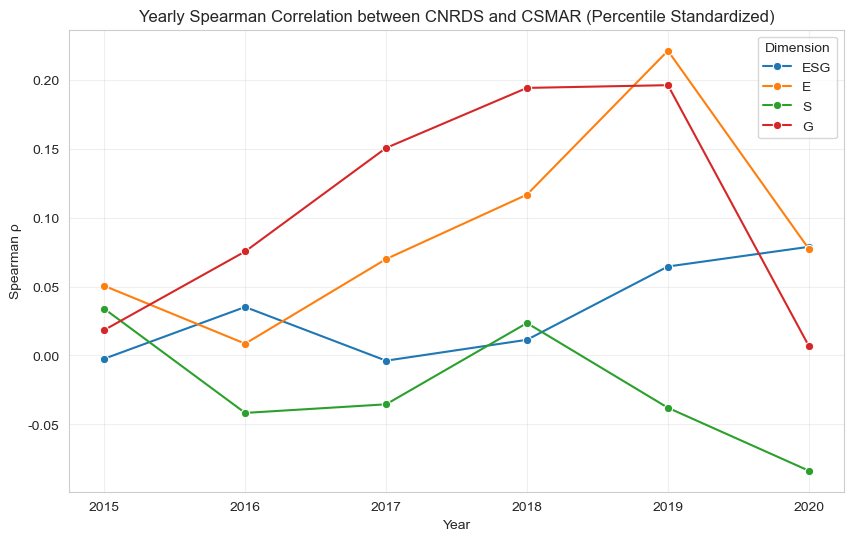

In [187]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=corr_year_df, x="Year", y="Spearman", hue="Dimension", marker="o")
plt.title("Yearly Spearman Correlation between CNRDS and CSMAR (Percentile Standardized)")
plt.ylabel("Spearman ρ")
plt.xlabel("Year")
plt.legend(title="Dimension")
plt.grid(alpha=0.3)
plt.show()


#### Industry 

In [57]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr, pearsonr

dims = ["ESG", "E", "S", "G"]
MIN_N = 5  # 阈值

results = []

for (year, industry), sub in df.groupby(["Year", "CSMAR_Industry"]):
    for dim in dims:
        cn = f"CNRDS_{dim}_ind_pct"
        cs = f"CSMAR_{dim}_ind_pct"
        tmp = sub[[cn, cs]].dropna()
        n = len(tmp)
        
        # 如果样本量太小，直接写0
        if n < MIN_N or tmp[cn].nunique() < 2 or tmp[cs].nunique() < 2:
            rho, r = 0, 0
        else:
            rho = spearmanr(tmp[cn], tmp[cs]).correlation
            r = pearsonr(tmp[cn], tmp[cs]).statistic
        
        results.append({
            "Year": year,
            "Industry": industry,
            "Dimension": dim,
            "Spearman": rho,
            "Pearson": r,
            "N": n
        })

corr_ind_df = pd.DataFrame(results)
corr_ind_df.to_excel("industry_year_correlation_MIN5_zero.xlsx", index=False)
corr_ind_df


Year                                     Industry Dimension  Spearman  \
0    2015                                  Agriculture       ESG  0.000000   
1    2015                                  Agriculture         E  0.000000   
2    2015                                  Agriculture         S  0.000000   
3    2015                                  Agriculture         G  0.000000   
4    2015                                Air Transport       ESG -0.657143   
..    ...                                          ...       ...       ...   
899  2020  Transportation, Storage and Postal Services         G -0.175568   
900  2020                   Wholesale and Retail Trade       ESG -0.173931   
901  2020                   Wholesale and Retail Trade         E -0.376851   
902  2020                   Wholesale and Retail Trade         S -0.600000   
903  2020                   Wholesale and Retail Trade         G  0.142857   

      Pearson   N  
0    0.000000   2  
1    0.000000   2  
2    0.000000   2  
3    0.000000   2  
4   -0.666366   6  
..        ...  ..  
899 -0.175568  17  
900  0.050303   6  
901 -0.318293   6  
902 -0.679431   6  
903  0.134339   6  

[904 rows x 6 columns]

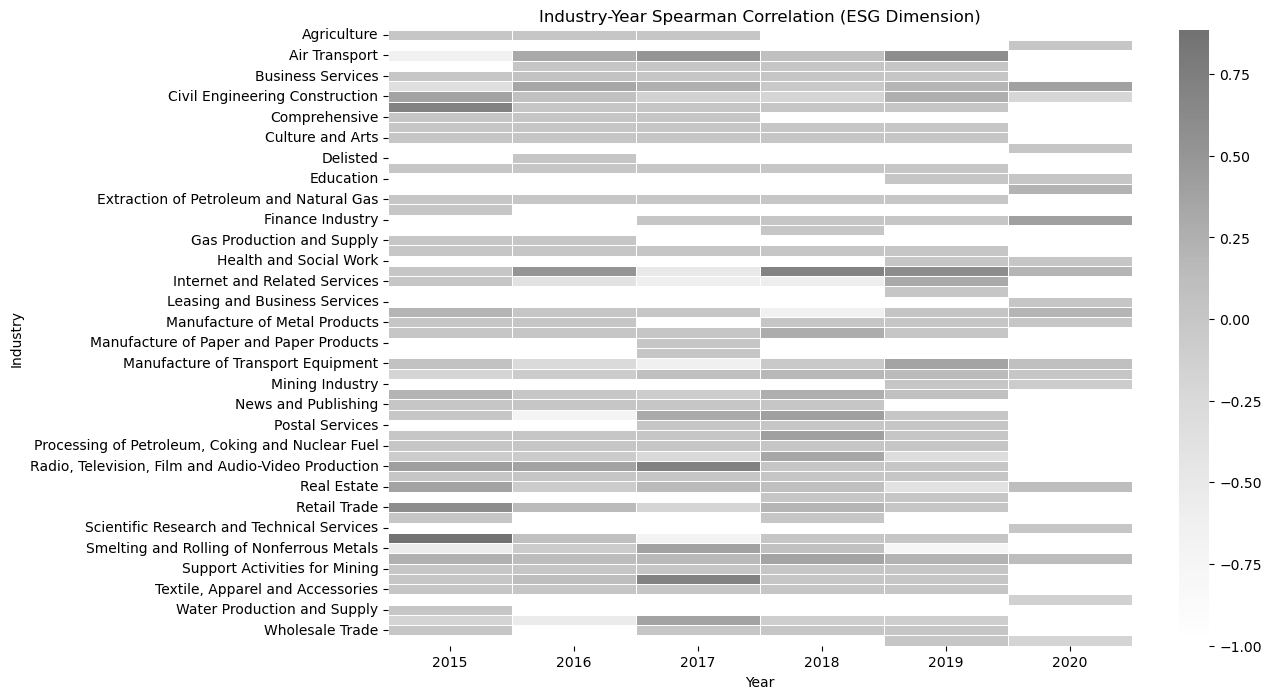

In [133]:
pivot = corr_ind_df[corr_ind_df["Dimension"] == "ESG"].pivot(index="Industry", columns="Year", values="Spearman")

plt.figure(figsize=(12, 8))
sns.heatmap(pivot, cmap="Greys", center=0.5, linewidths=0.5, annot=False)
plt.title("Industry-Year Spearman Correlation (ESG Dimension)")
plt.xlabel("Year")
plt.ylabel("Industry")
plt.show()


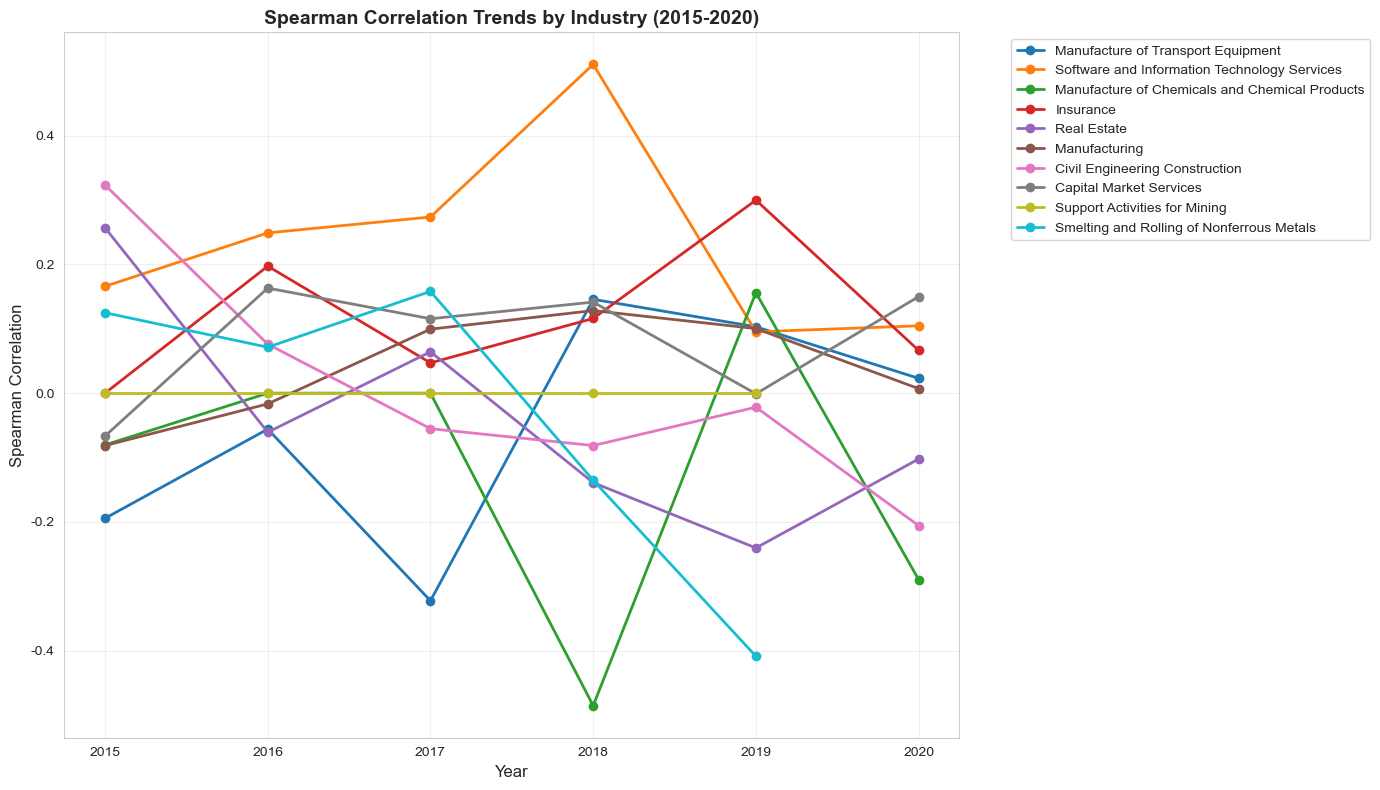

Year Range: 2015 - 2020


In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 设置中文字体和图形样式
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False
sns.set_style("whitegrid")

# 复制数据并处理
plot_data = corr_ind_df.copy()

# 删除Spearman为NaN的行
plot_data = plot_data.dropna(subset=['Spearman'])

# 创建图形
plt.figure(figsize=(14, 8))

# 获取产业列表（可以选择特定的产业或者全部）
# 选择数据量较多的产业来展示，避免图形过于拥挤
industry_counts = plot_data['Industry'].value_counts()
# 选择出现次数最多的前10个产业，你可以调整这个数字
top_industries = industry_counts.head(10).index

# 筛选数据
filtered_data = plot_data[plot_data['Industry'].isin(top_industries)]

# 按年份和产业计算平均Spearman相关系数
yearly_industry_avg = filtered_data.groupby(['Year', 'Industry'])['Spearman'].mean().reset_index()

# 绘制折线图
for industry in top_industries:
    industry_data = yearly_industry_avg[yearly_industry_avg['Industry'] == industry]
    plt.plot(industry_data['Year'], industry_data['Spearman'], 
             marker='o', linewidth=2, markersize=6, label=industry)

plt.xlabel('Year', fontsize=12)
plt.ylabel('Spearman Correlation', fontsize=12)
plt.title('Spearman Correlation Trends by Industry (2015-2020)', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 显示统计数据
print(f"Year Range: {plot_data['Year'].min()} - {plot_data['Year'].max()}")

In [135]:
# strong positive
strong_pos = corr_ind_df[corr_ind_df["Spearman"] > 0.5]
# strong negative
strong_neg = corr_ind_df[corr_ind_df["Spearman"] < -0.5]

print("🌿 Strong Positive Correlations (>0.5):")
display(strong_pos[["Year", "Industry", "Dimension", "Spearman", "N"]])

print("🔥 Strong Negative Correlations (<-0.5):")
display(strong_neg[["Year", "Industry", "Dimension", "Spearman", "N"]])


🌿 Strong Positive Correlations (>0.5):


Year                                           Industry Dimension  \
7    2015                                      Air Transport         G   
20   2015                            Coal Mining and Washing       ESG   
23   2015                            Coal Mining and Washing         G   
66   2015     Manufacture of Chemicals and Chemical Products         S   
110  2015  Radio, Television, Film and Audio-Video Produc...         S   
117  2015                                        Real Estate         E   
120  2015                                       Retail Trade       ESG   
122  2015                                       Retail Trade         S   
123  2015                                       Retail Trade         G   
128  2015             Smelting and Rolling of Ferrous Metals       ESG   
130  2015             Smelting and Rolling of Ferrous Metals         S   
131  2015             Smelting and Rolling of Ferrous Metals         G   
134  2015          Smelting and Rolling of Nonferrous Metals         S   
137  2015       Software and Information Technology Services         E   
159  2015                                    Water Transport         G   
169  2016                                      Air Transport         E   
247  2016                 Manufacture of Transport Equipment         G   
262  2016               Nonferrous Metal Mining and Dressing         S   
277  2016  Radio, Television, Film and Audio-Video Produc...         E   
301  2016       Software and Information Technology Services         E   
323  2016                                    Wholesale Trade         G   
331  2017                                      Air Transport         G   
438  2017      Production and Supply of Electricity and Heat         S   
440  2017  Radio, Television, Film and Audio-Video Produc...       ESG   
441  2017  Radio, Television, Film and Audio-Video Produc...         E   
465  2017       Software and Information Technology Services         E   
472  2017  Telecommunications, Broadcasting and Satellite...       ESG   
475  2017  Telecommunications, Broadcasting and Satellite...         G   
540  2018                                          Insurance       ESG   
541  2018                                          Insurance         E   
562  2018                 Manufacture of Transport Equipment         S   
578  2018               Nonferrous Metal Mining and Dressing         S   
595  2018      Production and Supply of Electricity and Heat         G   
615  2018                                       Retail Trade         G   
623  2018             Smelting and Rolling of Ferrous Metals         G   
629  2018       Software and Information Technology Services         E   
630  2018       Software and Information Technology Services         S   
652  2019                                      Air Transport       ESG   
708  2019                                          Insurance       ESG   
711  2019                                          Insurance         G   
714  2019                      Internet and Related Services         S   
722  2019     Manufacture of Chemicals and Chemical Products         S   
731  2019       Manufacture of Non-metallic Mineral Products         G   
797  2019       Software and Information Technology Services         E   
815  2019                                    Water Transport         G   
882  2020                                    Mining Industry         S   

     Spearman   N  
7    0.608760   6  
20   0.714286   6  
23   0.771429   6  
66   0.579771   6  
110  0.700000   5  
117  0.590268  12  
120  0.600000   5  
122  0.900000   5  
123  0.900000   5  
128  0.885714   6  
130  0.811679   6  
131  0.714286   6  
134  0.785714   8  
137  0.693023  11  
159  0.678571   7  
169  0.794461   6  
247  0.577411   9  
262  0.615587   5  
277  0.695608   6  
301  0.639164  16  
323  0.527046   5  
331  1.000000   5  
438  0.515152  10  
440  0.714286   6  
441  0.695608   6  
465  0

🔥 Strong Negative Correlations (<-0.5):


Year                                           Industry Dimension  \
4    2015                                      Air Transport       ESG   
65   2015     Manufacture of Chemicals and Chemical Products         E   
95   2015               Nonferrous Metal Mining and Dressing         G   
121  2015                                       Retail Trade         E   
132  2015          Smelting and Rolling of Nonferrous Metals       ESG   
170  2016                                      Air Transport         S   
179  2016                                  Business Services         G   
231  2016                      Internet and Related Services         G   
246  2016                 Manufacture of Transport Equipment         S   
260  2016               Nonferrous Metal Mining and Dressing       ESG   
289  2016                                       Retail Trade         E   
294  2016             Smelting and Rolling of Ferrous Metals         S   
310  2016  Telecommunications, Broadcasting and Satellite...         S   
316  2016                                    Water Transport       ESG   
320  2016                                    Wholesale Trade       ESG   
384  2017                      Internet and Related Services       ESG   
387  2017                      Internet and Related Services         G   
404  2017                 Manufacture of Transport Equipment       ESG   
421  2017               Nonferrous Metal Mining and Dressing         E   
456  2017             Smelting and Rolling of Ferrous Metals       ESG   
458  2017             Smelting and Rolling of Ferrous Metals         S   
542  2018                                          Insurance         S   
544  2018                      Internet and Related Services       ESG   
548  2018     Manufacture of Chemicals and Chemical Products       ESG   
550  2018     Manufacture of Chemicals and Chemical Products         S   
579  2018               Nonferrous Metal Mining and Dressing         G   
606  2018                                        Real Estate         S   
621  2018             Smelting and Rolling of Ferrous Metals         E   
622  2018             Smelting and Rolling of Ferrous Metals         S   
715  2019                      Internet and Related Services         G   
729  2019       Manufacture of Non-metallic Mineral Products         E   
778  2019                                        Real Estate         S   
792  2019          Smelting and Rolling of Nonferrous Metals       ESG   
793  2019          Smelting and Rolling of Nonferrous Metals         E   
799  2019       Software and Information Technology Services         G   
813  2019                                    Water Transport         E   
835  2020                     Civil Engineering Construction         G   
858  2020                                          Insurance         S   
865  2020     Manufacture of Chemicals and Chemical Products         E   
902  2020                         Wholesale and Retail Trade         S   

     Spearman   N  
4   -0.657143   6  
65  -0.608760   6  
95  -0.892857   7  
121 -0.707107   5  
132 -0.547619   8  
170 -0.714286   6  
179 -1.000000   5  
231 -0.974679   5  
246 -0.594147   9  
260 -0.718185   5  
289 -0.777542   6  
294 -0.579771   6  
310 -0.564288   5  
316 -0.542857   6  
320 -1.000000   5  
384 -0.607143   7  
387 -0.792825   7  
404 -0.616667   9  
421 -0.700000   5  
456 -0.700000   5  
458 -0.800000   5  
542 -0.700000   5  
544 -0.600000   5  
548 -0.657143   6  
550 -0.828571   6  
579 -0.615587   5  
606 -0.542040  15  
621 -0.600000   5  
622 -0.800000   5  
715 -0.900000   5  
729 -0.714286   7  
778 -0.645067  16  
792 -0.766667   9  
793 -0.569043   9  
799 -0.640256  10  
813 -0.700000   5  
835 -0.683333   9  
858 -0.542857   6  
865 -0.700000   5  
902 -0.600000   6

In [61]:
# Strong Positive 分析
print("🌿 Strong Positive Correlations - Industry Dimension Count:")

# 按Year和Industry分组，计算每个行业的Dimension数量和具体维度
strong_pos_summary = strong_pos.groupby(['Year', 'Industry']).agg({
    'Dimension': ['count', lambda x: list(x.unique())]
}).reset_index()

strong_pos_summary.columns = ['Year', 'Industry', 'Dimension_Count', 'Dimensions']
strong_pos_summary = strong_pos_summary.sort_values(['Year', 'Dimension_Count'], ascending=[True, False])

display(strong_pos_summary)

print("\n" + "="*80 + "\n")

# Strong Negative 分析
print("🔥 Strong Negative Correlations - Industry Dimension Count:")

if not strong_neg.empty:
    strong_neg_summary = strong_neg.groupby(['Year', 'Industry']).agg({
        'Dimension': ['count', lambda x: list(x.unique())]
    }).reset_index()
    
    strong_neg_summary.columns = ['Year', 'Industry', 'Dimension_Count', 'Dimensions']
    strong_neg_summary = strong_neg_summary.sort_values(['Year', 'Dimension_Count'], ascending=[True, False])
    
    display(strong_neg_summary)
else:
    print("No strong negative correlations found.")

🌿 Strong Positive Correlations - Industry Dimension Count:


NameError: name 'strong_pos' is not defined

In [151]:
# 更详细的年度统计 - Strong Positive
print("Strong Positive - Detailed Yearly Industry Analysis:")
yearly_detailed = strong_pos_summary.groupby('Year').agg({
    'Industry': ['count', lambda x: list(x)],
    'Dimension_Count': 'sum'
}).reset_index()

yearly_detailed.columns = ['Year', 'Unique_Industries_Count', 'Industries_List', 'Total_Dimensions_Count']
display(yearly_detailed)

print("\n" + "="*80 + "\n")

# Strong Negative 的详细统计（如果有数据）
if not strong_neg.empty:
    print("Strong Negative - Detailed Yearly Industry Analysis:")
    yearly_detailed_neg = strong_neg_summary.groupby('Year').agg({
        'Industry': ['count', lambda x: list(x)],
        'Dimension_Count': 'sum'
    }).reset_index()
    
    yearly_detailed_neg.columns = ['Year', 'Unique_Industries_Count', 'Industries_List', 'Total_Dimensions_Count']
    display(yearly_detailed_neg)

Strong Positive - Detailed Yearly Industry Analysis:


Year  Unique_Industries_Count  \
0  2015                       10   
1  2016                        6   
2  2017                        5   
3  2018                        7   
4  2019                        7   
5  2020                        1   

                                     Industries_List  Total_Dimensions_Count  
0  [Retail Trade, Smelting and Rolling of Ferrous...                      15  
1  [Air Transport, Manufacture of Transport Equip...                       6  
2  [Radio, Television, Film and Audio-Video Produ...                       7  
3  [Insurance, Software and Information Technolog...                       9  
4  [Insurance, Air Transport, Internet and Relate...                       8  
5                                  [Mining Industry]                       1



Strong Negative - Detailed Yearly Industry Analysis:


Year  Unique_Industries_Count  \
0  2015                        5   
1  2016                       10   
2  2017                        4   
3  2018                        6   
4  2019                        6   
5  2020                        4   

                                     Industries_List  Total_Dimensions_Count  
0  [Air Transport, Manufacture of Chemicals and C...                       5  
1  [Air Transport, Business Services, Internet an...                      10  
2  [Internet and Related Services, Smelting and R...                       6  
3  [Manufacture of Chemicals and Chemical Product...                       8  
4  [Smelting and Rolling of Nonferrous Metals, In...                       7  
5  [Civil Engineering Construction, Insurance, Ma...                       4

In [63]:
industry_avg = (
    corr_ind_df.groupby(["Industry", "Dimension"])["Spearman"]
    .mean()
    .reset_index()
    .pivot(index="Industry", columns="Dimension", values="Spearman")
)

industry_avg = industry_avg[industry_avg["ESG"] > 0].sort_values("ESG", ascending=False)
display(industry_avg.round(3))


Dimension                                               E    ESG      G      S
Industry                                                                      
Radio, Television, Film and Audio-Video Production  0.278  0.299  0.151  0.219
Insurance                                           0.041  0.250  0.311 -0.117
Electricity, Heat, Gas and Water Supply             0.462  0.217 -0.433  0.051
Software and Information Technology Services        0.623  0.208 -0.171  0.273
Air Transport                                      -0.040  0.169  0.253 -0.214
Telecommunications, Broadcasting and Satellite ... -0.033  0.160  0.213 -0.013
Retail Trade                                       -0.286  0.149  0.429  0.310
Coal Mining and Washing                            -0.017  0.143  0.154 -0.046
Capital Market Services                            -0.102  0.132  0.208  0.097
Finance Industry                                    0.083  0.100 -0.030  0.003
Monetary Financial Services                         0.011  0.090 -0.091  0.041
Processing of Agricultural and Sideline Food        0.000  0.080 -0.092  0.080
Manufacture of Non-metallic Mineral Products       -0.237  0.057  0.157  0.079
Smelting and Rolling of Ferrous Metals             -0.165  0.054  0.449 -0.274
Real Estate                                         0.146  0.044 -0.056 -0.281
Civil Engineering Construction                      0.170  0.023 -0.138 -0.031
Manufacturing                                       0.038  0.019  0.152 -0.051
Business Services                                   0.057  0.010 -0.200 -0.092

In [65]:
dim_avg = corr_ind_df.groupby("Dimension")["Spearman"].mean().round(3)
print("Average Spearman Correlation by Dimension:")
print(dim_avg)


Average Spearman Correlation by Dimension:
Dimension
E      0.003
ESG    0.024
G      0.026
S      0.006
Name: Spearman, dtype: float64


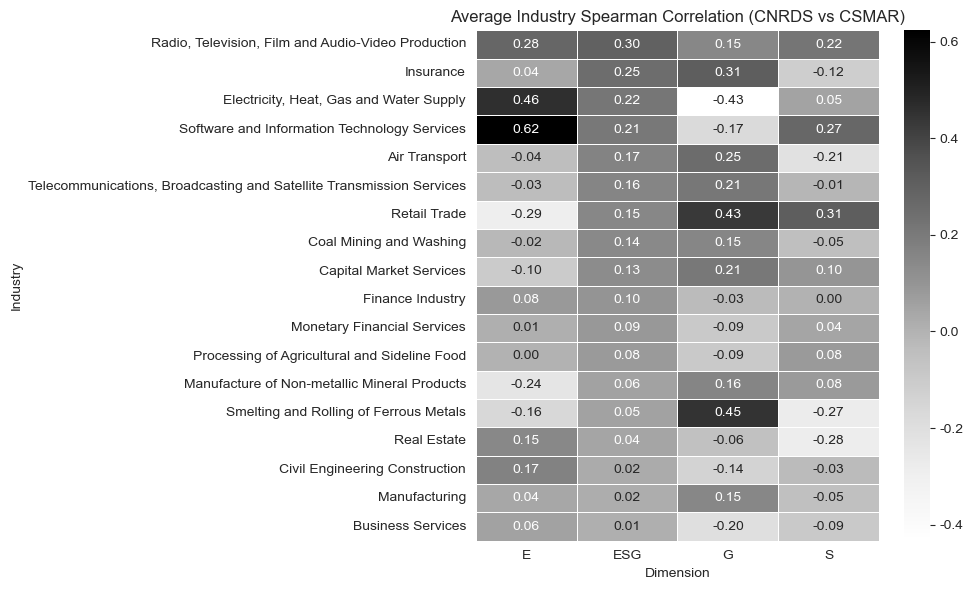

In [55]:
industry_avg_filled = industry_avg.fillna(0)

plt.figure(figsize=(10,6))
sns.heatmap(industry_avg_filled, cmap="Greys", linewidths=0.5, annot=True, fmt=".2f")
plt.title("Average Industry Spearman Correlation (CNRDS vs CSMAR)")
plt.xlabel("Dimension")
plt.ylabel("Industry")
plt.tight_layout()
plt.show()


#### ANOVA: Prove the Difference is Consistent

In [195]:
print(df.columns)

Index(['Year', 'Date', 'Code', 'Name', 'FullName', 'CSMAR_Industry',
       'CSMAR_Industry_1', 'CSMAR_Industry_2', 'ESG_CSMAR', 'E_CSMAR',
       'S_CSMAR', 'G_CSMAR', 'ESGManagementscore', 'ESGRiskScore',
       'SpecialNotes', 'ESG_CNRDS', 'ESG_CNRDS_rank', 'E_CNRDS',
       'E_CNRDS_rank', 'S_CNRDS', 'S_CNRDS_rank', 'G_CNRDS', 'G_CNRDS_rank',
       'CNRDS_ESG_pct', 'CSMAR_ESG_pct', 'CNRDS_E_pct', 'CSMAR_E_pct',
       'CNRDS_S_pct', 'CSMAR_S_pct', 'CNRDS_G_pct', 'CSMAR_G_pct',
       'CSMAR_ESG_ind_pct', 'CSMAR_E_ind_pct', 'CSMAR_S_ind_pct',
       'CSMAR_G_ind_pct', 'CNRDS_ESG_ind_pct', 'CNRDS_E_ind_pct',
       'CNRDS_S_ind_pct', 'CNRDS_G_ind_pct', 'CSMAR_ESG_year_pct',
       'CSMAR_E_year_pct', 'CSMAR_S_year_pct', 'CSMAR_G_year_pct',
       'CNRDS_ESG_year_pct', 'CNRDS_E_year_pct', 'CNRDS_S_year_pct',
       'CNRDS_G_year_pct'],
      dtype='object', name=0)


#### Difference Effect Model
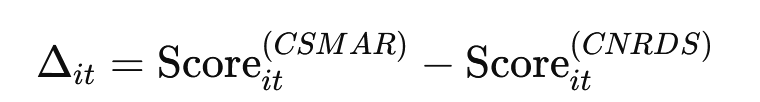
If this is significant different from zero.   

In [103]:
df_long["System"] = df_long["System"].astype("category")
df_long["CSMAR_Industry"] = df_long["CSMAR_Industry"].astype("category")
df_long["Year"] = df_long["Year"].astype("category")
 

In [110]:
print(df.columns)

Index(['Year', 'Date', 'Code', 'Name', 'FullName', 'CSMAR_Industry',
       'CSMAR_Industry_1', 'CSMAR_Industry_2', 'ESG_CSMAR', 'E_CSMAR',
       'S_CSMAR', 'G_CSMAR', 'ESGManagementscore', 'ESGRiskScore',
       'SpecialNotes', 'ESG_CNRDS', 'ESG_CNRDS_rank', 'E_CNRDS',
       'E_CNRDS_rank', 'S_CNRDS', 'S_CNRDS_rank', 'G_CNRDS', 'G_CNRDS_rank',
       'CNRDS_ESG_pct', 'CSMAR_ESG_pct', 'CNRDS_E_pct', 'CSMAR_E_pct',
       'CNRDS_S_pct', 'CSMAR_S_pct', 'CNRDS_G_pct', 'CSMAR_G_pct',
       'CSMAR_ESG_ind_pct', 'CSMAR_E_ind_pct', 'CSMAR_S_ind_pct',
       'CSMAR_G_ind_pct', 'CNRDS_ESG_ind_pct', 'CNRDS_E_ind_pct',
       'CNRDS_S_ind_pct', 'CNRDS_G_ind_pct', 'CSMAR_ESG_year_pct',
       'CSMAR_E_year_pct', 'CSMAR_S_year_pct', 'CSMAR_G_year_pct',
       'CNRDS_ESG_year_pct', 'CNRDS_E_year_pct', 'CNRDS_S_year_pct',
       'CNRDS_G_year_pct'],
      dtype='object', name=0)


**Difference Test on Data**  
If this is significant different from zero.   
Conduct paired-sample t-tests and Wilcoxon signed-rank tests to compare firm-level scores between the CSMAR and CNRDS ESG rating systems.
* Statistically Significnat: The results show that mean differences across all four dimensions (E, S, G, and overall ESG) are highly significant (p < 0.001).
    * Specifically, CSMAR assigns substantially higher scores than CNRDS in the overall ESG dimension (mean difference = +20.05) and in the Environmental dimension (mean difference = +11.71), while it assigns significantly lower scores in the Governance dimension (mean difference = −15.54) and slightly lower scores in the Social dimension (mean difference = −3.18).
* These results indicate that the two ESG rating systems exhibit systematic scoring discrepancies even after normalization, reflecting distinct methodological orientations.

In [136]:
import pandas as pd
from scipy import stats

# 四个维度
dims = ["ESG", "E", "S", "G"]
results = []

for dim in dims:
    print(f"\n--- {dim} ---")

    # 提取对应维度标准化后的得分列
    df_sub = df[[f"{dim}_CSMAR", f"{dim}_CNRDS"]].dropna()

    # 计算差值
    diff = df_sub[f"{dim}_CSMAR"] - df_sub[f"{dim}_CNRDS"]

    # 配对样本 t 检验
    t_stat, p_val = stats.ttest_rel(df_sub[f"{dim}_CSMAR"], df_sub[f"{dim}_CNRDS"])

    # Wilcoxon 检验（非参数，防止分布非正态）
    try:
        w_stat, w_pval = stats.wilcoxon(df_sub[f"{dim}_CSMAR"], df_sub[f"{dim}_CNRDS"])
    except ValueError:
        w_stat, w_pval = (None, None)

    results.append({
        "Dimension": dim,
        "Mean(CSMAR - CNRDS)": diff.mean(),
        "Std.Dev": diff.std(),
        "Paired t-stat": t_stat,
        "t-test p-value": p_val,
        "Wilcoxon p-value": w_pval
    })

# 结果表格
result_table = pd.DataFrame(results)
print("\nFirm-level paired test between ESG rating systems (standardized percentile scores)\n")
display(result_table)



--- ESG ---

--- E ---

--- S ---

--- G ---

Firm-level paired test between ESG rating systems (standardized percentile scores)



Dimension  Mean(CSMAR - CNRDS)    Std.Dev  Paired t-stat  t-test p-value  \
0       ESG            20.047270  11.186488      75.672340    0.000000e+00   
1         E            11.709757  17.393566      28.427255   6.625652e-147   
2         S            -3.181554  20.043752      -6.702486    2.740527e-11   
3         G           -15.544725  17.616434     -37.259817   3.423736e-225   

   Wilcoxon p-value  
0     5.867035e-279  
1     1.167812e-149  
2      5.180138e-23  
3     2.299000e-170

**Difference Test on Data After Standardized**  
This is significant different from zero.   
Conduct paired-sample t-tests and Wilcoxon signed-rank tests to compare firm-level standardized percentile scores (0–100) between the CSMAR and CNRDS ESG rating systems.
* Statistically Insignificnat: The results show that mean differences across all four dimensions (E, S, G, and overall ESG) are statistically insignificant (p ≈ 1.0), and the average score differences are near zero.
* This indicates that after normalization, the two ESG rating systems yield nearly identical assessments for the same firms.

In [119]:
import pandas as pd
from scipy import stats

# 四个维度
dims = ["ESG", "E", "S", "G"]
results = []

for dim in dims:
    print(f"\n--- {dim} ---")

    # 提取对应维度标准化后的得分列
    df_sub = df[[f"CSMAR_{dim}_pct", f"CNRDS_{dim}_pct"]].dropna()

    # 计算差值
    diff = df_sub[f"CSMAR_{dim}_pct"] - df_sub[f"CNRDS_{dim}_pct"]

    # 配对样本 t 检验
    t_stat, p_val = stats.ttest_rel(df_sub[f"CSMAR_{dim}_pct"], df_sub[f"CNRDS_{dim}_pct"])

    # Wilcoxon 检验（非参数，防止分布非正态）
    try:
        w_stat, w_pval = stats.wilcoxon(df_sub[f"CSMAR_{dim}_pct"], df_sub[f"CNRDS_{dim}_pct"])
    except ValueError:
        w_stat, w_pval = (None, None)

    results.append({
        "Dimension": dim,
        "Mean(CSMAR - CNRDS)": diff.mean(),
        "Std.Dev": diff.std(),
        "Paired t-stat": t_stat,
        "t-test p-value": p_val,
        "Wilcoxon p-value": w_pval
    })

# 结果表格
result_table = pd.DataFrame(results)
print("\nFirm-level paired test between ESG rating systems (standardized percentile scores)\n")
display(result_table)



--- ESG ---

--- E ---

--- S ---

--- G ---

Firm-level paired test between ESG rating systems (standardized percentile scores)



Dimension  Mean(CSMAR - CNRDS)   Std.Dev  Paired t-stat  t-test p-value  \
0       ESG        -5.977645e-18  0.401858  -6.281066e-16             1.0   
1         E        -2.490685e-18  0.389254  -2.701852e-16             1.0   
2         S         4.981371e-19  0.413270   5.089680e-17             1.0   
3         G         0.000000e+00  0.386008   0.000000e+00             1.0   

   Wilcoxon p-value  
0          0.468202  
1          0.276757  
2          0.835673  
3          0.569776

**Difference According to Year**  
No significant difference. 

* Paired-sample t-tests and Wilcoxon signed-rank tests based on year-standardized percentile scores show no significant differences between the CSMAR and CNRDS ESG ratings across all years (2015–2020) and all dimensions (E, S, G, and overall ESG), with p-values equal to 1.0.
* This indicates that after normalization by year, the two ESG rating systems exhibit highly stable and consistent scoring patterns over time.
* Therefore, temporal variation is not a major source of divergence between the two systems; instead, rating discrepancies primarily originate from industry-level heterogeneity rather than year-to-year methodological changes.

In [154]:
import pandas as pd
from scipy import stats
import numpy as np

# 四个维度
DIMS = ["ESG", "E", "S", "G"]
YEAR_COL = "Year"   # 如果列名不同请改

def per_year_tests(df, dim, year_col=YEAR_COL):
    """对单个维度（ESG/E/S/G）按年份做配对差异检验"""
    c_col = f"CSMAR_{dim}_year_pct"
    n_col = f"CNRDS_{dim}_year_pct"

    use = df[[year_col, c_col, n_col]].dropna().copy()
    use["diff"] = use[c_col] - use[n_col]

    def _agg(g):
        x = g["diff"].values
        n = len(x)
        mean_ = float(np.mean(x))
        std_  = float(np.std(x, ddof=1)) if n > 1 else np.nan

        try:
            t_stat, p_t = stats.ttest_1samp(x, popmean=0.0)
        except Exception:
            t_stat, p_t = (np.nan, np.nan)

        try:
            if np.allclose(x, 0) or n < 5:
                w_stat, p_w = (np.nan, np.nan)
            else:
                w_stat, p_w = stats.wilcoxon(x)
        except Exception:
            w_stat, p_w = (np.nan, np.nan)

        return pd.Series({
            "n": n,
            "mean_diff(CSMAR-CNRDS)": mean_,
            "std_diff": std_,
            "t_stat": t_stat,
            "t_p": p_t,
            "wilcoxon_p": p_w
        })

    out = use.groupby(year_col, as_index=False).apply(_agg).reset_index(drop=True)
    out["abs_mean_diff"] = out["mean_diff(CSMAR-CNRDS)"].abs()
    return out


# === 主流程：对 ESG / E / S / G 四个维度分别执行 ===
per_year_tables = {}
summary_rows = []

for dim in DIMS:
    year_table = per_year_tests(df, dim)
    per_year_tables[dim] = year_table

    tmp = year_table.copy()
    tmp.insert(0, "Dimension", dim)
    summary_rows.append(tmp)

year_diff_summary = pd.concat(summary_rows, ignore_index=True)

print("\nYear-level differences between CSMAR and CNRDS (year-standardized percentiles):\n")
display(year_diff_summary[[
    "Dimension", YEAR_COL, "n",
    "mean_diff(CSMAR-CNRDS)", "std_diff", "t_stat", "t_p", "wilcoxon_p"
]])



Year-level differences between CSMAR and CNRDS (year-standardized percentiles):



C:\Users\wanyi\AppData\Local\Temp\ipykernel_22840\1887171690.py:45: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  out = use.groupby(year_col, as_index=False).apply(_agg).reset_index(drop=True)
C:\Users\wanyi\AppData\Local\Temp\ipykernel_22840\1887171690.py:45: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  out = use.groupby(year_col, as_index=False).apply(_agg).reset_index(drop=True)
C:\Users\wanyi\AppData\L

Dimension  Year      n  mean_diff(CSMAR-CNRDS)  std_diff        t_stat  \
0        ESG  2015  284.0           -1.563694e-18  0.409431 -6.436215e-17   
1        ESG  2016  296.0           -2.250452e-18  0.401670 -9.639322e-17   
2        ESG  2017  291.0            6.104319e-18  0.409704  2.541640e-16   
3        ESG  2018  297.0            0.000000e+00  0.406588  0.000000e+00   
4        ESG  2019  298.0           -5.960929e-18  0.395513 -2.601725e-16   
5        ESG  2020  317.0            2.801825e-18  0.392446  1.271132e-16   
6          E  2015  284.0            5.472930e-18  0.398343  2.315376e-16   
7          E  2016  296.0            2.250452e-18  0.407052  9.511855e-17   
8          E  2017  291.0            0.000000e+00  0.394279  0.000000e+00   
9          E  2018  297.0           -9.719124e-18  0.384286 -4.358643e-16   
10         E  2019  298.0           -3.353023e-18  0.360895 -1.603848e-16   
11         E  2020  317.0            1.400912e-18  0.392752  6.350707e-17   
12         S  2015  284.0           -3.127389e-18  0.401844 -1.311547e-16   
13         S  2016  296.0            6.001206e-18  0.417243  2.474543e-16   
14         S  2017  291.0            0.000000e+00  0.416047  0.000000e+00   
15         S  2018  297.0            7.476249e-19  0.404041  3.188867e-17   
16         S  2019  298.0            6.333487e-18  0.416550  2.624727e-16   
17         S  2020  317.0            0.000000e+00  0.425618  0.000000e+00   
18         G  2015  284.0            7.818472e-19  0.405127  3.252293e-17   
19         G  2016  296.0           -2.250452e-18  0.393169 -9.847732e-17   
20         G  2017  291.0           -1.220864e-17  0.376884 -5.525944e-16   
21         G  2018  297.0            5.980999e-18  0.367101  2.807802e-16   
22         G  2019  298.0           -5.960929e-18  0.366641 -2.806602e-16   
23         G  2020  317.0            0.000000e+00  0.407468  0.000000e+00   

    t_p  wilcoxon_p  
0   1.0    0.807896  
1   1.0    0.780347  
2   1.0    0.772159  
3   1.0    0.784516  
4   1.0    0.835576  
5   1.0    0.640140  
6   1.0    0.611455  
7   1.0    0.566874  
8   1.0    0.543424  
9   1.0    0.604366  
10  1.0    0.859250  
11  1.0    0.871580  
12  1.0    0.965740  
13  1.0    0.991880  
14  1.0    0.769944  
15  1.0    0.960024  
16  1.0    0.906224  
17  1.0    0.950199  
18  1.0    0.829916  
19  1.0    0.757638  
20  1.0    0.909015  
21  1.0    0.874557  
22  1.0    0.719901  
23  1.0    0.817649

**Difference According to Industry Level_ 1**  
No significant difference. 


In [166]:
import pandas as pd
from scipy import stats
import numpy as np

# 你已有的 DataFrame：df
# 需要的列示例：
# 'CSMAR_ESG_ind_pct','CNRDS_ESG_ind_pct', ... 同理 E/S/G

DIMS = ["ESG", "E", "S", "G"]
IND_COL = "CSMAR_Industry_1"   # 行业列名，如不一致这里改一下

def per_industry_tests(df, dim, industry_col=IND_COL):
    """对单个维度（ESG/E/S/G）在行业内做配对差异检验并返回行业结果表。"""
    c_col = f"CSMAR_{dim}_ind_pct"
    n_col = f"CNRDS_{dim}_ind_pct"
    use = df[[industry_col, c_col, n_col]].dropna().copy()

    # 公司层面的行业内百分位差值（正=CSMAR更高）
    use["diff"] = use[c_col] - use[n_col]

    # 行业聚合统计
    def _agg(g):
        x = g["diff"].values
        n = len(x)
        mean_ = float(np.mean(x))
        std_  = float(np.std(x, ddof=1)) if n > 1 else np.nan

        # 单样本 t 检验：均值是否显著偏离 0
        try:
            t_stat, p_t = stats.ttest_1samp(x, popmean=0.0, alternative="two-sided")
        except Exception:
            t_stat, p_t = (np.nan, np.nan)

        # Wilcoxon（非参数），需要至少1个非零、n>=10更稳
        try:
            if np.allclose(x, 0) or n < 5:
                w_stat, p_w = (np.nan, np.nan)
            else:
                w_stat, p_w = stats.wilcoxon(x, alternative="two-sided", zero_method="wilcox")
        except Exception:
            w_stat, p_w = (np.nan, np.nan)

        return pd.Series({
            "n": n,
            "mean_diff(CSMAR-CNRDS)": mean_,
            "std_diff": std_,
            "t_stat": t_stat, "t_p": p_t,
            "wilcoxon_p": p_w
        })

    out = use.groupby(industry_col, as_index=False).apply(_agg).reset_index(drop=True)
    # 排序：按绝对均值差
    out["abs_mean_diff"] = out["mean_diff(CSMAR-CNRDS)"].abs()
    out = out.sort_values(["abs_mean_diff", "n"], ascending=[False, False])

    return out, use  # 返回行业表 & 公司层面差值（如要画图）

# —— 主流程：四个维度分别计算，并做一个总览表（显示Top差异行业） ——
per_dim_tables = {}
summary_rows = []

TOPK = 10  # 每个维度挑最大的行业差异前K条用于总览

for dim in DIMS:
    ind_table, firm_diff = per_industry_tests(df, dim)
    per_dim_tables[dim] = ind_table

    # 取Top差异行业做摘要
    topk = ind_table.head(TOPK).copy()
    topk.insert(0, "Dimension", dim)
    summary_rows.append(topk)

industry_diff_summary = pd.concat(summary_rows, ignore_index=True)

# 打印结果：维度→行业差异TopK
print("Industry-level differences based on industry-relative percentiles (CSMAR - CNRDS):\n")
display(industry_diff_summary[[
    "Dimension", IND_COL, "n", "mean_diff(CSMAR-CNRDS)",
    "std_diff", "t_stat", "t_p", "wilcoxon_p"
]])

# 如需查看某一维度完整行业表，例如 ESG：
display(per_dim_tables["ESG"])


C:\Users\wanyi\AppData\Local\Temp\ipykernel_22840\2158597725.py:51: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  out = use.groupby(industry_col, as_index=False).apply(_agg).reset_index(drop=True)
C:\Users\wanyi\AppData\Local\Temp\ipykernel_22840\2158597725.py:51: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  out = use.groupby(industry_col, as_index=False).apply(_agg).reset_index(drop=True)
C:\Users\wanyi\A

Industry-level differences based on industry-relative percentiles (CSMAR - CNRDS):



C:\Users\wanyi\AppData\Local\Temp\ipykernel_22840\2158597725.py:51: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  out = use.groupby(industry_col, as_index=False).apply(_agg).reset_index(drop=True)


Dimension                                   CSMAR_Industry_1      n  \
0        ESG            Electricity, Heat, Gas and Water Supply   10.0   
1        ESG                                     Other Services  123.0   
2        ESG                                             Health   12.0   
3        ESG        Transportation, Storage and Postal Services   97.0   
4        ESG                        Raw Materials Manufacturing  166.0   
5        ESG  Agriculture, Forestry, Animal Husbandry and Fi...   13.0   
6        ESG                                        Real Estate   92.0   
7        ESG                                      Manufacturing  593.0   
8        ESG                                   Finance Industry  325.0   
9        ESG                        Water Production and Supply   65.0   
10         E            Electricity, Heat, Gas and Water Supply   10.0   
11         E                        Raw Materials Manufacturing  166.0   
12         E                        Water Production and Supply   65.0   
13         E                                             Health   12.0   
14         E                      Leasing and Business Services    3.0   
15         E                                    Mining Industry   85.0   
16         E        Transportation, Storage and Postal Services   97.0   
17         E                                       Construction   74.0   
18         E                                     Other Services  123.0   
19         E       Software and Information Technology Services  118.0   
20         S                                             Health   12.0   
21         S        Transportation, Storage and Postal Services   97.0   
22         S                        Water Production and Supply   65.0   
23         S                                       Construction   74.0   
24         S  Agriculture, Forestry, Animal Husbandry and Fi...   13.0   
25         S                                     Other Services  123.0   
26         S                                   Finance Industry  325.0   
27         S            Electricity, Heat, Gas and Water Supply   10.0   
28         S                                    Mining Industry   85.0   
29         S                        Raw Materials Manufacturing  166.0   
30         G  Agriculture, Forestry, Animal Husbandry and Fi...   13.0   
31         G                                             Health   12.0   
32         G                                        Real Estate   92.0   
33         G                                    Mining Industry   85.0   
34         G                                     Other Services  123.0   
35         G                                       Construction   74.0   
36         G        Transportation, Storage and Postal Services   97.0   
37         G                        Water Production and Supply   65.0   
38         G       Software and Information Technology Services  118.0   
39         G                                      Manufacturing  593.0   

    mean_diff(CSMAR-CNRDS)  std_diff        t_stat  t_p  wilcoxon_p  
0             2.775558e-17  0.389444  2.253747e-16  1.0    0.858832  
1            -1.353931e-17  0.363152 -4.134852e-16  1.0    0.886096  
2             9.251859e-18  0.459468  6.975319e-17  1.0    1.000000  
3             5.722799e-18  0.440100  1.280686e-16  1.0    0.958959  
4            -5.350472e-18  0.428634 -1.608271e-16  1.0    0.765772  
5             4.270089e-18  0.360041  4.276184e-17  1.0    0.943838  
6             3.620292e-18  0.402563  8.625888e-17  1.0    0.853098  
7            -2.995543e-18  0.406476 -1.794603e-16  1.0    0.936441  
8             2.049643e-18  0.369420  1.000228e-16  1.0    0.847044  
9             1.708035e-18  0.422172  3.261848e-17  1.0    0.993977  
10           -2.220446e-17  0.399305 -1.758472e-16  1.0    1.000000  
11            2.140189e-17  0.451853  6.102520e-16  1.0    0.997404  
12           -1.878839e-17  0.408701 -3.706302e-16  1.0   

CSMAR_Industry_1      n  \
2             Electricity, Heat, Gas and Water Supply   10.0   
9                                      Other Services  123.0   
4                                              Health   12.0   
13        Transportation, Storage and Postal Services   97.0   
10                        Raw Materials Manufacturing  166.0   
0   Agriculture, Forestry, Animal Husbandry and Fi...   13.0   
11                                        Real Estate   92.0   
7                                       Manufacturing  593.0   
3                                    Finance Industry  325.0   
15                        Water Production and Supply   65.0   
12       Software and Information Technology Services  118.0   
8                                     Mining Industry   85.0   
1                                        Construction   74.0   
14  Water Conservancy, Environment and Public Faci...    5.0   
6                       Leasing and Business Services    3.0   
5                              Health and Social Work    2.0   

    mean_diff(CSMAR-CNRDS)  std_diff        t_stat  t_p  wilcoxon_p  \
2             2.775558e-17  0.389444  2.253747e-16  1.0    0.858832   
9            -1.353931e-17  0.363152 -4.134852e-16  1.0    0.886096   
4             9.251859e-18  0.459468  6.975319e-17  1.0    1.000000   
13            5.722799e-18  0.440100  1.280686e-16  1.0    0.958959   
10           -5.350472e-18  0.428634 -1.608271e-16  1.0    0.765772   
0             4.270089e-18  0.360041  4.276184e-17  1.0    0.943838   
11            3.620292e-18  0.402563  8.625888e-17  1.0    0.853098   
7            -2.995543e-18  0.406476 -1.794603e-16  1.0    0.936441   
3             2.049643e-18  0.369420  1.000228e-16  1.0    0.847044   
15            1.708035e-18  0.422172  3.261848e-17  1.0    0.993977   
12           -1.411300e-18  0.363266 -4.220227e-17  1.0    0.924679   
8            -1.306145e-18  0.410461 -2.933787e-17  1.0    0.972186   
1             0.000000e+00  0.411804  0.000000e+00  1.0    0.825933   
14            0.000000e+00  0.000000           NaN  NaN         NaN   
6             0.000000e+00  0.333333  0.000000e+00  1.0         NaN   
5             0.000000e+00  0.707107  0.000000e+00  1.0         NaN   

    abs_mean_diff  
2    2.775558e-17  
9    1.353931e-17  
4    9.251859e-18  
13   5.722799e-18  
10   5.350472e-18  
0    4.270089e-18  
11   3.620292e-18  
7    2.995543e-18  
3    2.049643e-18  
15   1.708035e-18  
12   1.411300e-18  
8    1.306145e-18  
1    0.000000e+00  
14   0.000000e+00  
6    0.000000e+00  
5    0.000000e+00

**Difference According to More Detailed Industry**
* Some Industry are Significant Different


In [177]:
import pandas as pd
from scipy import stats
import numpy as np

# 你已有的 DataFrame：df
# 需要的列示例：
# 'CSMAR_ESG_ind_pct','CNRDS_ESG_ind_pct', ... 同理 E/S/G

DIMS = ["ESG", "E", "S", "G"]
IND_COL = "CSMAR_Industry"   # 行业列名，如不一致这里改一下

def per_industry_tests(df, dim, industry_col=IND_COL):
    """对单个维度（ESG/E/S/G）在行业内做配对差异检验并返回行业结果表。"""
    c_col = f"CSMAR_{dim}_ind_pct"
    n_col = f"CNRDS_{dim}_ind_pct"
    use = df[[industry_col, c_col, n_col]].dropna().copy()

    # 公司层面的行业内百分位差值（正=CSMAR更高）
    use["diff"] = use[c_col] - use[n_col]

    # 行业聚合统计
    def _agg(g):
        x = g["diff"].values
        n = len(x)
        mean_ = float(np.mean(x))
        std_  = float(np.std(x, ddof=1)) if n > 1 else np.nan

        # 单样本 t 检验：均值是否显著偏离 0
        try:
            t_stat, p_t = stats.ttest_1samp(x, popmean=0.0, alternative="two-sided")
        except Exception:
            t_stat, p_t = (np.nan, np.nan)

        # Wilcoxon（非参数），需要至少1个非零、n>=10更稳
        try:
            if np.allclose(x, 0) or n < 5:
                w_stat, p_w = (np.nan, np.nan)
            else:
                w_stat, p_w = stats.wilcoxon(x, alternative="two-sided", zero_method="wilcox")
        except Exception:
            w_stat, p_w = (np.nan, np.nan)

        return pd.Series({
            "n": n,
            "mean_diff(CSMAR-CNRDS)": mean_,
            "std_diff": std_,
            "t_stat": t_stat, "t_p": p_t,
            "wilcoxon_p": p_w
        })

    out = use.groupby(industry_col, as_index=False).apply(_agg).reset_index(drop=True)
    # 排序：按绝对均值差
    out["abs_mean_diff"] = out["mean_diff(CSMAR-CNRDS)"].abs()
    out = out.sort_values(["abs_mean_diff", "n"], ascending=[False, False])

    return out, use  # 返回行业表 & 公司层面差值（如要画图）

# —— 主流程：四个维度分别计算，并做一个总览表（显示Top差异行业） ——
per_dim_tables = {}
summary_rows = []

TOPK = 10  # 每个维度挑最大的行业差异前K条用于总览

for dim in DIMS:
    ind_table, firm_diff = per_industry_tests(df, dim)
    per_dim_tables[dim] = ind_table

    # 取Top差异行业做摘要
    topk = ind_table.head(TOPK).copy()
    topk.insert(0, "Dimension", dim)
    summary_rows.append(topk)

industry_diff_summary = pd.concat(summary_rows, ignore_index=True)

# 打印结果：维度→行业差异TopK
print("Industry-level differences based on industry-relative percentiles (CSMAR - CNRDS):\n")
display(industry_diff_summary[[
    "Dimension", IND_COL, "n", "mean_diff(CSMAR-CNRDS)",
    "std_diff", "t_stat", "t_p", "wilcoxon_p"
]])

# 如需查看某一维度完整行业表，例如 ESG：
display(per_dim_tables["ESG"].dropna())


C:\Users\wanyi\anaconda3\Lib\site-packages\scipy\stats\_wilcoxon.py:199: UserWarning: Sample size too small for normal approximation.
  temp = _wilcoxon_iv(x, y, zero_method, correction, alternative, method, axis)
C:\Users\wanyi\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1087: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
C:\Users\wanyi\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1087: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
C:\Users\wanyi\AppData\Local\Temp\ipykernel_22840\4196881532.py:51: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to sil

Industry-level differences based on industry-relative percentiles (CSMAR - CNRDS):



Dimension                                    CSMAR_Industry     n  \
0        ESG                                   Postal Services  11.0   
1        ESG        Manufacture of Rubber and Plastic Products   2.0   
2        ESG    Manufacture of Chemicals and Chemical Products  31.0   
3        ESG      Processing of Agricultural and Sideline Food  20.0   
4        ESG                     Support Activities for Mining  11.0   
5        ESG        Scientific Research and Technical Services   2.0   
6        ESG                  Textile, Apparel and Accessories   8.0   
7        ESG                                    Road Transport   2.0   
8        ESG                                     Comprehensive   8.0   
9        ESG            Smelting and Rolling of Ferrous Metals  26.0   
10         E      Processing of Agricultural and Sideline Food  20.0   
11         E        Scientific Research and Technical Services   2.0   
12         E                     Support Activities for Mining  11.0   
13         E                   Food and Essential Goods Retail   1.0   
14         E                                     Comprehensive   8.0   
15         E                 Ferrous Metal Mining and Dressing   1.0   
16         E                       Water Production and Supply   2.0   
17         E  Processing of Petroleum, Coking and Nuclear Fuel   7.0   
18         E                                   Postal Services  11.0   
19         E            Smelting and Rolling of Ferrous Metals  26.0   
20         S                                   Postal Services  11.0   
21         S           Manufacture of Paper and Paper Products   1.0   
22         S                                           Leasing   1.0   
23         S        Manufacture of Rubber and Plastic Products   2.0   
24         S                   Food and Essential Goods Retail   1.0   
25         S                  Textile, Apparel and Accessories   8.0   
26         S                               News and Publishing   9.0   
27         S    Manufacture of Chemicals and Chemical Products  31.0   
28         S                                   Water Transport  29.0   
29         S                                          Delisted   1.0   
30         G                                           Leasing   1.0   
31         G                         Gas Production and Supply   2.0   
32         G        Manufacture of Rubber and Plastic Products   2.0   
33         G           Manufacture of Paper and Paper Products   1.0   
34         G                                      Construction   6.0   
35         G                                   Postal Services  11.0   
36         G                                  Culture and Arts   6.0   
37         G  Processing of Petroleum, Coking and Nuclear Fuel   7.0   
38         G                   Food and Essential Goods Retail   1.0   
39         G                                    Rail Transport   9.0   

    mean_diff(CSMAR-CNRDS)  std_diff     t_stat           t_p  wilcoxon_p  
0                -0.546717  0.255818  -7.088082  3.342648e-05    0.001953  
1                -0.520000  0.509117  -1.444444  3.855017e-01         NaN  
2                -0.395438  0.369968  -5.951068  1.598760e-06    0.000010  
3                -0.386666  0.274189  -6.306680  4.710977e-06    0.000004  
4                 0.377491  0.289579   4.323508  1.504809e-03    0.004883  
5                 0.366667  0.612826   0.846154  5.529294e-01         NaN  
6                -0.321400  0.239374  -3.797641  6.735458e-03    0.007812  
7                 0.310764  0.046649   9.421053  6.732209e-02         NaN  
8                -0.297619  0.364577  -2.308961  5.426978e-02    0.078125  
9                 0.291274  0.368953   4.025477  4.640520e-04    0.000465  
10               -0.498126  0.305452  -7.293078  6.437802e-07    0.000013  
11                0.483333  0.306413   2.230769  2.682838e-01         NaN  
12                0.465942  0.312058   4.952142  5.767013e-04 

CSMAR_Industry      n  \
38                                    Postal Services   11.0   
27     Manufacture of Chemicals and Chemical Products   31.0   
39       Processing of Agricultural and Sideline Food   20.0   
52                      Support Activities for Mining   11.0   
54                   Textile, Apparel and Accessories    8.0   
8                                       Comprehensive    8.0   
49             Smelting and Rolling of Ferrous Metals   26.0   
10                                   Culture and Arts    6.0   
57                                    Water Transport   29.0   
36                                News and Publishing    9.0   
9                                        Construction    6.0   
24                      Internet and Related Services   25.0   
53  Telecommunications, Broadcasting and Satellite...   19.0   
35                        Monetary Financial Services   96.0   
42  Radio, Television, Film and Audio-Video Produc...   24.0   
32                 Manufacture of Transport Equipment   49.0   
16            Extraction of Petroleum and Natural Gas   13.0   
5                             Capital Market Services  164.0   
37               Nonferrous Metal Mining and Dressing   26.0   
29       Manufacture of Non-metallic Mineral Products   24.0   
22                             Health and Social Work    5.0   
50          Smelting and Rolling of Nonferrous Metals   45.0   
46                                       Retail Trade   26.0   
34                                    Mining Industry   13.0   
23                                          Insurance   31.0   
59                         Wholesale and Retail Trade    7.0   
58                                    Wholesale Trade   18.0   
21                                             Health    8.0   
2                                       Air Transport   29.0   
4                                   Business Services   19.0   
7                             Coal Mining and Washing   21.0   
3                                    Animal Husbandry    7.0   
28                      Manufacture of Metal Products    7.0   
40   Processing of Petroleum, Coking and Nuclear Fuel    7.0   
18                                   Finance Industry   33.0   
43                                     Rail Transport    9.0   
51       Software and Information Technology Services   73.0   
6                      Civil Engineering Construction   69.0   
33                                      Manufacturing  535.0   
41      Production and Supply of Electricity and Heat   62.0   
44                                        Real Estate   91.0   
55        Transportation, Storage and Postal Services   17.0   
15            Electricity, Heat, Gas and Water Supply    9.0   

    mean_diff(CSMAR-CNRDS)  std_diff        t_stat       t_p  wilcoxon_p  \
38           -5.467172e-01  0.255818 -7.088082e+00  0.000033    0.001953   
27           -3.954380e-01  0.369968 -5.951068e+00  0.000002    0.000010   
39           -3.866655e-01  0.274189 -6.306680e+00  0.000005    0.000004   
52            3.774909e-01  0.289579  4.323508e+00  0.001505    0.004883   
54           -3.213996e-01  0.239374 -3.797641e+00  0.006735    0.007812   
8            -2.976190e-01  0.364577 -2.308961e+00  0.054270    0.078125   
49            2.912740e-01  0.368953  4.025477e+00  0.000464    0.000465   
10            2.886122e-01  0.191028  3.700786e+00  0.013988    0.043114   
57            2.244458e-01  0.427088  2.830045e+00  0.008515    0.007101   
36            1.894145e-01  0.249944  2.273485e+00  0.052604    0.049950   
9            -1.869797e-01  0.192287 -2.381885e+00  0.063018    0.093750   
24           -1.784606e-01  0.357352 -2.496987e+00  0.019786    0.025505   
53            1.689032e-01  0.315418  2.334146e+00  0.031377    0.018082   
35            1.585336e-01  0.339767  4.571677e+00  0.000015    0.000028   
42           -1.159539e-01  0.318507 -1.783496e+00  0.087708    0.159224   
32    

In [183]:
display(per_dim_tables["ESG"].dropna().sort_values("t_p"))

CSMAR_Industry      n  \
27     Manufacture of Chemicals and Chemical Products   31.0   
39       Processing of Agricultural and Sideline Food   20.0   
35                        Monetary Financial Services   96.0   
38                                    Postal Services   11.0   
49             Smelting and Rolling of Ferrous Metals   26.0   
5                             Capital Market Services  164.0   
52                      Support Activities for Mining   11.0   
54                   Textile, Apparel and Accessories    8.0   
57                                    Water Transport   29.0   
10                                   Culture and Arts    6.0   
24                      Internet and Related Services   25.0   
53  Telecommunications, Broadcasting and Satellite...   19.0   
36                                News and Publishing    9.0   
8                                       Comprehensive    8.0   
32                 Manufacture of Transport Equipment   49.0   
9                                        Construction    6.0   
42  Radio, Television, Film and Audio-Video Produc...   24.0   
29       Manufacture of Non-metallic Mineral Products   24.0   
37               Nonferrous Metal Mining and Dressing   26.0   
50          Smelting and Rolling of Nonferrous Metals   45.0   
16            Extraction of Petroleum and Natural Gas   13.0   
46                                       Retail Trade   26.0   
23                                          Insurance   31.0   
58                                    Wholesale Trade   18.0   
2                                       Air Transport   29.0   
33                                      Manufacturing  535.0   
4                                   Business Services   19.0   
34                                    Mining Industry   13.0   
22                             Health and Social Work    5.0   
7                             Coal Mining and Washing   21.0   
18                                   Finance Industry   33.0   
51       Software and Information Technology Services   73.0   
21                                             Health    8.0   
59                         Wholesale and Retail Trade    7.0   
6                      Civil Engineering Construction   69.0   
3                                    Animal Husbandry    7.0   
44                                        Real Estate   91.0   
41      Production and Supply of Electricity and Heat   62.0   
28                      Manufacture of Metal Products    7.0   
43                                     Rail Transport    9.0   
40   Processing of Petroleum, Coking and Nuclear Fuel    7.0   
55        Transportation, Storage and Postal Services   17.0   
15            Electricity, Heat, Gas and Water Supply    9.0   

    mean_diff(CSMAR-CNRDS)  std_diff        t_stat       t_p  wilcoxon_p  \
27           -3.954380e-01  0.369968 -5.951068e+00  0.000002    0.000010   
39           -3.866655e-01  0.274189 -6.306680e+00  0.000005    0.000004   
35            1.585336e-01  0.339767  4.571677e+00  0.000015    0.000028   
38           -5.467172e-01  0.255818 -7.088082e+00  0.000033    0.001953   
49            2.912740e-01  0.368953  4.025477e+00  0.000464    0.000465   
5            -9.830597e-02  0.363229 -3.465939e+00  0.000676    0.001616   
52            3.774909e-01  0.289579  4.323508e+00  0.001505    0.004883   
54           -3.213996e-01  0.239374 -3.797641e+00  0.006735    0.007812   
57            2.244458e-01  0.427088  2.830045e+00  0.008515    0.007101   
10            2.886122e-01  0.191028  3.700786e+00  0.013988    0.043114   
24           -1.784606e-01  0.357352 -2.496987e+00  0.019786    0.025505   
53            1.689032e-01  0.315418  2.334146e+00  0.031377    0.018082   
36            1.894145e-01  0.249944  2.273485e+00  0.052604    0.049950   
8            -2.976190e-01  0.364577 -2.308961e+00  0.054270    0.078125   
32            1.146037e-01  0.411426  1.949868e+00  0.057046    0.034126   
9     

### Difference with Max-Min Standardization

In [24]:
# Data Prepare
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# 设置中文字体（如果需要）
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# 定义要比较的维度
dimensions = ['ESG', 'E', 'S', 'G']

# 查看我们要比较的变量对
print("Variables to Compare:")
for dim in dimensions:
    csmar_cols = [col for col in df.columns if f'CSMAR_{dim}' in col and '_MM' in col]
    cnrds_cols = [col for col in df.columns if f'CNRDS_{dim}' in col and '_MM' in col]
    
    print(f"\n{dim} Dimension:")
    for csmar_col, cnrds_col in zip(csmar_cols, cnrds_cols):
        print(f"  {csmar_col} vs {cnrds_col}")

Variables to Compare:

ESG Dimension:
  CSMAR_ESG_MM vs CNRDS_ESG_MM
  CSMAR_ESG_ind_MM vs CNRDS_ESG_ind_MM
  CSMAR_ESG_year_MM vs CNRDS_ESG_year_MM

E Dimension:
  CSMAR_ESG_MM vs CNRDS_ESG_MM
  CSMAR_E_MM vs CNRDS_E_MM
  CSMAR_ESG_ind_MM vs CNRDS_ESG_ind_MM
  CSMAR_E_ind_MM vs CNRDS_E_ind_MM
  CSMAR_ESG_year_MM vs CNRDS_ESG_year_MM
  CSMAR_E_year_MM vs CNRDS_E_year_MM

S Dimension:
  CSMAR_S_MM vs CNRDS_S_MM
  CSMAR_S_ind_MM vs CNRDS_S_ind_MM
  CSMAR_S_year_MM vs CNRDS_S_year_MM

G Dimension:
  CSMAR_G_MM vs CNRDS_G_MM
  CSMAR_G_ind_MM vs CNRDS_G_ind_MM
  CSMAR_G_year_MM vs CNRDS_G_year_MM


In [28]:
# 我们先试一个变量对作为例子
# 选择CSMAR_ESG_MM和CNRDS_ESG_MM进行演示

csmar_data = df['CSMAR_ESG_MM'].dropna()
cnrds_data = df['CNRDS_ESG_MM'].dropna()

print("Step 1: Data Prepare")
print(f"CSMAR Number: {len(csmar_data)}")
print(f"CNRDS Number: {len(cnrds_data)}")

# 找到共同存在的索引
common_index = csmar_data.index.intersection(cnrds_data.index)
csmar_common = csmar_data.loc[common_index]
cnrds_common = cnrds_data.loc[common_index]

print(f"Pair the Number: {len(csmar_common)}")

print("\nStep 2: Statistical Difference")
print(f"CSMAR Mean: {csmar_common.mean():.4f}")
print(f"CNRDS Mean: {cnrds_common.mean():.4f}")
print(f"CSMAR SD: {csmar_common.std():.4f}")
print(f"CNRDS SD: {cnrds_common.std():.4f}")

print("\nStep 3: Calculate the Difference")
differences = csmar_common - cnrds_common
print(f"Mean Difference: {differences.mean():.4f}")
print(f"Difference's SD: {differences.std():.4f}")

print("\n Step 4: T-test")
t_stat, p_value = stats.ttest_rel(csmar_common, cnrds_common)
print(f"t statistics: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

print("\nStep 5: Significant result")
if p_value < 0.05:
    print("Result: Sginificant difference (p < 0.05)")
    if differences.mean() > 0:
        print("CSMAR Significant higher than CNRDS")
    else:
        print("CSMAR Significnat lower than CNRDS")
else:
    print("Result: No Significant difference (p ≥ 0.05)")

Step 1: Data Prepare
CSMAR Number: 1783
CNRDS Number: 1783
Pair the Number: 1783

Step 2: Statistical Difference
CSMAR Mean: 0.4304
CNRDS Mean: 0.3578
CSMAR SD: 0.1754
CNRDS SD: 0.1671

Step 3: Calculate the Difference
Mean Difference: 0.0727
Difference's SD: 0.2399

 Step 4: T-test
t statistics: 12.7928
p-value: 0.0000

Step 5: Significant result
Result: Sginificant difference (p < 0.05)
CSMAR Significant higher than CNRDS


In [38]:
# Create list to store results
results = []

print("Starting paired t-tests for all variable pairs...")
print("=" * 60)

for dim in dimensions:
    print(f"\nProcessing {dim} dimension:")
    print("-" * 30)
    
    # Get all variables for this dimension - FIXED MATCHING LOGIC
    # Use exact matching to avoid matching "E" with "ESG"
    csmar_cols = [col for col in df.columns if f'CSMAR_{dim}_' in col and '_MM' in col]
    cnrds_cols = [col for col in df.columns if f'CNRDS_{dim}_' in col and '_MM' in col]
    
    # Debug: print matched columns
    print(f"  Matched CSMAR columns: {csmar_cols}")
    print(f"  Matched CNRDS columns: {cnrds_cols}")
    
    for i, (csmar_col, cnrds_col) in enumerate(zip(csmar_cols, cnrds_cols)):
        print(f"  {i+1}. {csmar_col} vs {cnrds_col}")
        
        # Extract data
        csmar_data = df[csmar_col].dropna()
        cnrds_data = df[cnrds_col].dropna()
        
        # Find common index
        common_index = csmar_data.index.intersection(cnrds_data.index)
        csmar_common = csmar_data.loc[common_index]
        cnrds_common = cnrds_data.loc[common_index]
        
        # Skip if insufficient data
        if len(csmar_common) < 10:
            print("    Insufficient data, skipping")
            continue
        
        # Paired t-test
        t_stat, p_value = stats.ttest_rel(csmar_common, cnrds_common)
        mean_diff = csmar_common.mean() - cnrds_common.mean()
        
        # Store results
        result = {
            'Dimension': dim,
            'CSMAR_Variable': csmar_col,
            'CNRDS_Variable': cnrds_col,
            'CSMAR_Mean': csmar_common.mean(),
            'CNRDS_Mean': cnrds_common.mean(),
            'Mean_Difference': mean_diff,
            'T_Statistic': t_stat,
            'P_Value': p_value,
            'N_Observations': len(csmar_common),
            'Significant': p_value < 0.05
        }
        results.append(result)
        
        # Print brief results
        sig_flag = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else ""
        print(f"    Difference: {mean_diff:.4f}, p-value: {p_value:.4f} {sig_flag}")

print("\nTesting completed!")

Starting paired t-tests for all variable pairs...

Processing ESG dimension:
------------------------------
  Matched CSMAR columns: ['CSMAR_ESG_MM', 'CSMAR_ESG_ind_MM', 'CSMAR_ESG_year_MM']
  Matched CNRDS columns: ['CNRDS_ESG_MM', 'CNRDS_ESG_ind_MM', 'CNRDS_ESG_year_MM']
  1. CSMAR_ESG_MM vs CNRDS_ESG_MM
    Difference: 0.0727, p-value: 0.0000 ***
  2. CSMAR_ESG_ind_MM vs CNRDS_ESG_ind_MM
    Difference: 0.0132, p-value: 0.1190 
  3. CSMAR_ESG_year_MM vs CNRDS_ESG_year_MM
    Difference: 0.0727, p-value: 0.0000 ***

Processing E dimension:
------------------------------
  Matched CSMAR columns: ['CSMAR_E_MM', 'CSMAR_E_ind_MM', 'CSMAR_E_year_MM']
  Matched CNRDS columns: ['CNRDS_E_MM', 'CNRDS_E_ind_MM', 'CNRDS_E_year_MM']
  1. CSMAR_E_MM vs CNRDS_E_MM
    Difference: 0.2220, p-value: 0.0000 ***
  2. CSMAR_E_ind_MM vs CNRDS_E_ind_MM
    Difference: 0.1778, p-value: 0.0000 ***
  3. CSMAR_E_year_MM vs CNRDS_E_year_MM
    Difference: 0.2220, p-value: 0.0000 ***

Processing S dimension:
--

In [40]:
# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display all results
print("All Test Results:")
print("=" * 80)
display_columns = ['Dimension', 'CSMAR_Variable', 'CNRDS_Variable', 
                   'Mean_Difference', 'P_Value', 'Significant', 'N_Observations']

print(results_df[display_columns].round(4))

# Summarize significance results
print("\nSignificance Summary:")
print("=" * 40)
total_tests = len(results_df)
significant_tests = results_df['Significant'].sum()
print(f"Total tests: {total_tests}")
print(f"Significant differences: {significant_tests}")
print(f"Significant proportion: {significant_tests/total_tests*100:.1f}%")

# Summarize by dimension
print("\nSummary by Dimension:")
for dim in dimensions:
    dim_results = results_df[results_df['Dimension'] == dim]
    if len(dim_results) > 0:
        sig_count = dim_results['Significant'].sum()
        total_count = len(dim_results)
        print(f"{dim}: {sig_count}/{total_count} significant")

All Test Results:
   Dimension     CSMAR_Variable     CNRDS_Variable  Mean_Difference  P_Value  \
0        ESG       CSMAR_ESG_MM       CNRDS_ESG_MM           0.0727    0.000   
1        ESG   CSMAR_ESG_ind_MM   CNRDS_ESG_ind_MM           0.0132    0.119   
2        ESG  CSMAR_ESG_year_MM  CNRDS_ESG_year_MM           0.0727    0.000   
3          E         CSMAR_E_MM         CNRDS_E_MM           0.2220    0.000   
4          E     CSMAR_E_ind_MM     CNRDS_E_ind_MM           0.1778    0.000   
5          E    CSMAR_E_year_MM    CNRDS_E_year_MM           0.2220    0.000   
6          S         CSMAR_S_MM         CNRDS_S_MM           0.1939    0.000   
7          S     CSMAR_S_ind_MM     CNRDS_S_ind_MM           0.0552    0.000   
8          S    CSMAR_S_year_MM    CNRDS_S_year_MM           0.1939    0.000   
9          G         CSMAR_G_MM         CNRDS_G_MM           0.0283    0.000   
10         G     CSMAR_G_ind_MM     CNRDS_G_ind_MM           0.0400    0.000   
11         G    CSMAR_

The only insignificant difference: CSMAR and CNRDS in industry

In summary, this insignificant result tells us that, **after controlling for industry factors**, CSMAR and CNRDS are consistent in their overall ESG scores. This suggests that both systems reach similar conclusions when assessing a company's relative ESG performance within its industry.

This is actually a positive finding, indicating that the two rating systems can be used interchangeably in the context of intra-industry comparisons.

#### Correlation Matrix

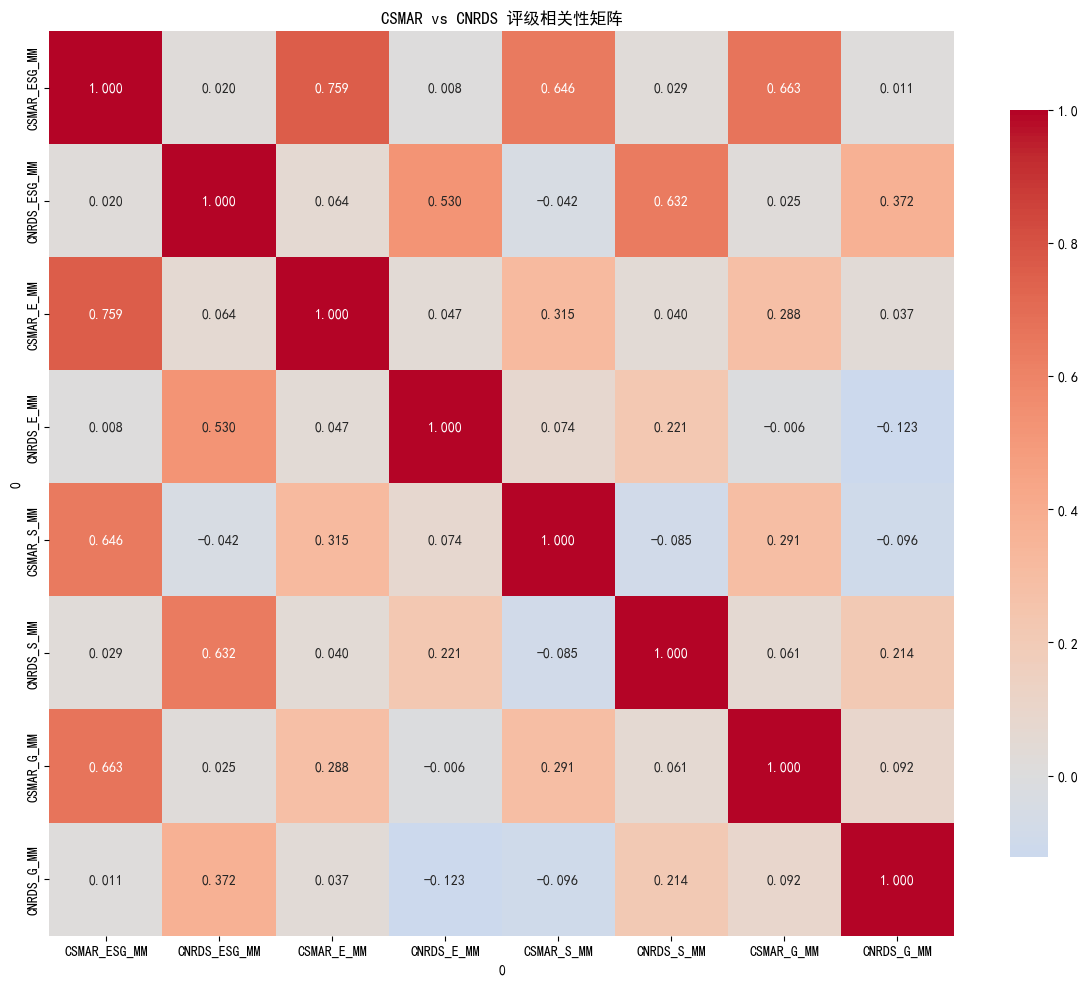

跨系统相关性:
ESG: 0.0198
E: 0.0469
S: -0.0855
G: 0.0916


In [51]:
# 创建相关性热图
correlation_cols = [
    'CSMAR_ESG_MM', 'CNRDS_ESG_MM', 'CSMAR_E_MM', 'CNRDS_E_MM',
    'CSMAR_S_MM', 'CNRDS_S_MM', 'CSMAR_G_MM', 'CNRDS_G_MM'
]

corr_matrix = df[correlation_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.3f', cbar_kws={"shrink": .8})
plt.title('CSMAR vs CNRDS 评级相关性矩阵')
plt.tight_layout()
plt.show()

# 重点关注跨系统的相关性
print("跨系统相关性:")
cross_correlations = []
for dim in ['ESG', 'E', 'S', 'G']:
    corr = df[f'CSMAR_{dim}_MM'].corr(df[f'CNRDS_{dim}_MM'])
    cross_correlations.append({'Dimension': dim, 'Cross_System_Correlation': corr})
    print(f"{dim}: {corr:.4f}")

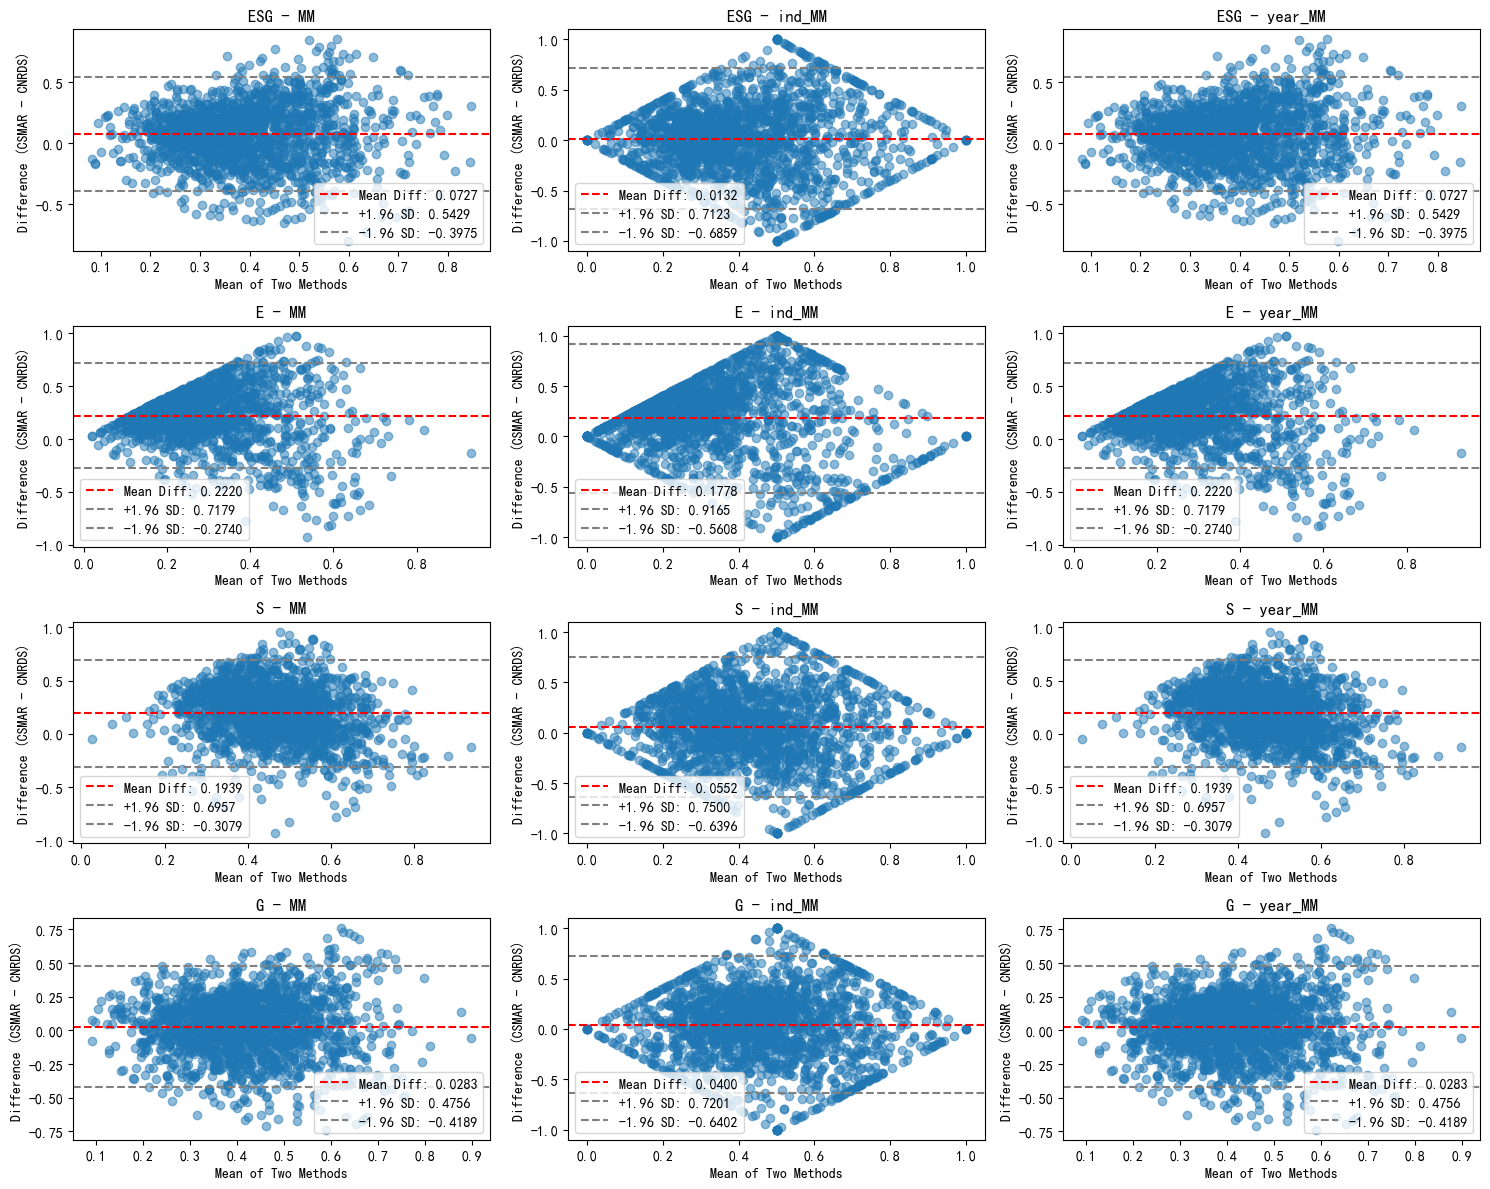

In [47]:
# Bland-Altman图
def bland_altman_plot(data1, data2, title, ax):
    """绘制Bland-Altman图"""
    mean = (data1 + data2) / 2
    diff = data1 - data2
    mean_diff = diff.mean()
    std_diff = diff.std()
    
    ax.scatter(mean, diff, alpha=0.5)
    ax.axhline(mean_diff, color='red', linestyle='--', label=f'Mean Diff: {mean_diff:.4f}')
    ax.axhline(mean_diff + 1.96 * std_diff, color='gray', linestyle='--', 
               label=f'+1.96 SD: {mean_diff + 1.96 * std_diff:.4f}')
    ax.axhline(mean_diff - 1.96 * std_diff, color='gray', linestyle='--', 
               label=f'-1.96 SD: {mean_diff - 1.96 * std_diff:.4f}')
    ax.set_xlabel('Mean of Two Methods')
    ax.set_ylabel('Difference (CSMAR - CNRDS)')
    ax.set_title(title)
    ax.legend()

# 为每个维度绘制Bland-Altman图
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.flatten()

plot_index = 0
for dim in dimensions:
    csmar_cols = [col for col in df.columns if f'CSMAR_{dim}_' in col and '_MM' in col]
    cnrds_cols = [col for col in df.columns if f'CNRDS_{dim}_' in col and '_MM' in col]
    
    for csmar_col, cnrds_col in zip(csmar_cols, cnrds_cols):
        # 提取数据
        data = df[[csmar_col, cnrds_col]].dropna()
        if len(data) < 10:
            continue
        
        bland_altman_plot(data[csmar_col], data[cnrds_col], 
                         f'{dim} - {csmar_col.replace(f"CSMAR_{dim}_", "")}', 
                         axes[plot_index])
        plot_index += 1

# 隐藏多余的子图
for i in range(plot_index, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

#### Correlation Result

In [55]:
from sklearn.metrics import cohen_kappa_score
import numpy as np

# 将连续评分转换为等级
def calculate_agreement_metrics(df, dimension, n_quantiles=5):
    """计算两个评级系统的一致性指标"""
    
    # 创建分位数分组
    csmar_quantile = pd.qcut(df[f'CSMAR_{dimension}_MM'], n_quantiles, labels=False, duplicates='drop')
    cnrds_quantile = pd.qcut(df[f'CNRDS_{dimension}_MM'], n_quantiles, labels=False, duplicates='drop')
    
    # 计算一致性指标
    accuracy = (csmar_quantile == cnrds_quantile).mean()
    kappa = cohen_kappa_score(csmar_quantile, cnrds_quantile)
    
    # 计算等级相关性
    rank_correlation = df[f'CSMAR_{dimension}_MM'].corr(df[f'CNRDS_{dimension}_MM'], method='spearman')
    
    return {
        'Dimension': dimension,
        'Exact_Agreement': accuracy,
        'Cohens_Kappa': kappa,
        'Rank_Correlation': rank_correlation,
        'N_Observations': len(df)
    }

# 对所有维度进行一致性分析
agreement_results = []
for dim in ['ESG', 'E', 'S', 'G']:
    result = calculate_agreement_metrics(df, dim)
    agreement_results.append(result)

agreement_df = pd.DataFrame(agreement_results)
print("Correlation Result:")
print(agreement_df.round(4))

Correlation Result:
  Dimension  Exact_Agreement  Cohens_Kappa  Rank_Correlation  N_Observations
0       ESG           0.1985       -0.0018            0.0321            1783
1         E           0.2199        0.0248            0.1188            1783
2         S           0.1935       -0.0081           -0.0600            1783
3         G           0.2182        0.0227            0.1073            1783


* The exact contract rate is approximately 19-22%, only slightly better than a random prediction (20%).
* The Cohen's Kappa coefficient is close to zero, even negative, indicating that consistency is no better than randomness.
* Rank correlation is very weak, with only 0.032 in the ESG dimension, 0.119 in the E dimension, negative (-0.060) in the S dimension, and 0.107 in the G dimension.

The consistency analysis between CSMAR and CNRDS ESG rating systems reveals fundamental divergences in their assessment methodologies. Across all dimensions (ESG, E, S, G), the exact agreement rates hover around only 20%, which is essentially equivalent to random chance given the quintile categorization used. More concerning are the Cohen's Kappa coefficients, which range from -0.0081 to 0.0248, indicating that the inter-rater reliability between the two systems is statistically no better than random assignment. The rank correlation coefficients further confirm this pattern, with values near zero (0.0321 for ESG) and even slightly negative for the social dimension (-0.0600).

These results suggest that CSMAR and CNRDS not only employ different scoring scales but fundamentally disagree on companies' relative ESG performances. The near-zero consistency metrics imply that the two systems capture different aspects of corporate sustainability or weight evaluation criteria differently. This has significant implications for both academic research and investment practice, as findings based on one rating system may not generalize to the other. The low consistency underscores the need for caution when comparing studies using different rating providers and highlights the contextual nature of ESG assessments in emerging markets.

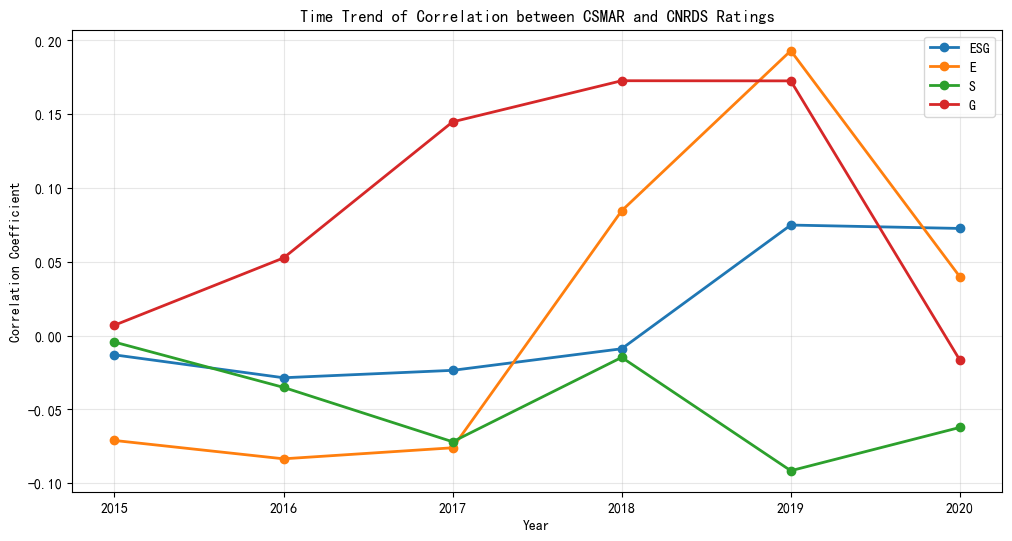

In [64]:
# Analyze correlation changes by year
yearly_correlations = []
for year in df['Year'].unique():
    year_data = df[df['Year'] == year]
    year_corrs = {}
    for dim in ['ESG', 'E', 'S', 'G']:
        if len(year_data) > 10:  # Ensure sufficient data
            corr = year_data[f'CSMAR_{dim}_MM'].corr(year_data[f'CNRDS_{dim}_MM'])
            year_corrs[dim] = corr
    year_corrs['Year'] = year
    yearly_correlations.append(year_corrs)

yearly_corr_df = pd.DataFrame(yearly_correlations)

# Plot time trend
plt.figure(figsize=(12, 6))
for dim in ['ESG', 'E', 'S', 'G']:
    plt.plot(yearly_corr_df['Year'], yearly_corr_df[dim], marker='o', label=dim, linewidth=2)

plt.xlabel('Year')
plt.ylabel('Correlation Coefficient')
plt.title('Time Trend of Correlation between CSMAR and CNRDS Ratings')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


Regression Analysis for ESG Dimension
                            OLS Regression Results                            
Dep. Variable:           CNRDS_ESG_MM   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7000
Date:                Thu, 30 Oct 2025   Prob (F-statistic):              0.403
Time:                        15:55:02   Log-Likelihood:                 660.48
No. Observations:                1783   AIC:                            -1317.
Df Residuals:                    1781   BIC:                            -1306.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const    

C:\Users\wanyi\AppData\Local\Temp\ipykernel_20800\3886132974.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Intercept': model.params[0],
C:\Users\wanyi\AppData\Local\Temp\ipykernel_20800\3886132974.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Slope': model.params[1],
C:\Users\wanyi\AppData\Local\Temp\ipykernel_20800\3886132974.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Slope_p_value': model.pvalues[1],
C:\

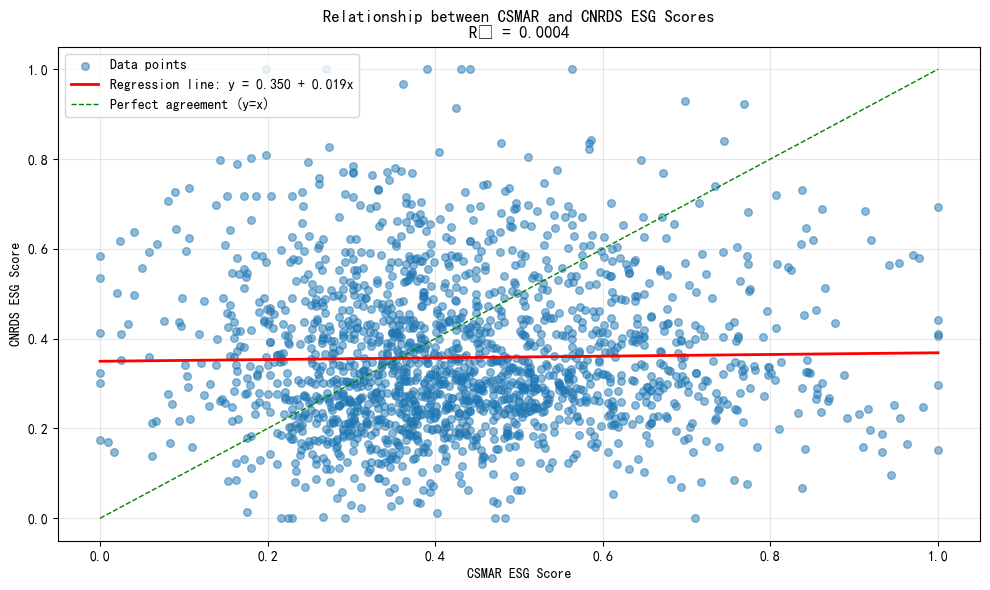

C:\Users\wanyi\AppData\Local\Temp\ipykernel_20800\3886132974.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Intercept': model.params[0],
C:\Users\wanyi\AppData\Local\Temp\ipykernel_20800\3886132974.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Slope': model.params[1],
C:\Users\wanyi\AppData\Local\Temp\ipykernel_20800\3886132974.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Slope_p_value': model.pvalues[1],



Regression Analysis for E Dimension
                            OLS Regression Results                            
Dep. Variable:             CNRDS_E_MM   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.919
Date:                Thu, 30 Oct 2025   Prob (F-statistic):             0.0479
Time:                        15:55:02   Log-Likelihood:                 409.79
No. Observations:                1783   AIC:                            -815.6
Df Residuals:                    1781   BIC:                            -804.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          

C:\Users\wanyi\AppData\Local\Temp\ipykernel_20800\3886132974.py:62: UserWarning: Glyph 178 (\N{SUPERSCRIPT TWO}) missing from current font.
  plt.tight_layout()
C:\Users\wanyi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 178 (\N{SUPERSCRIPT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


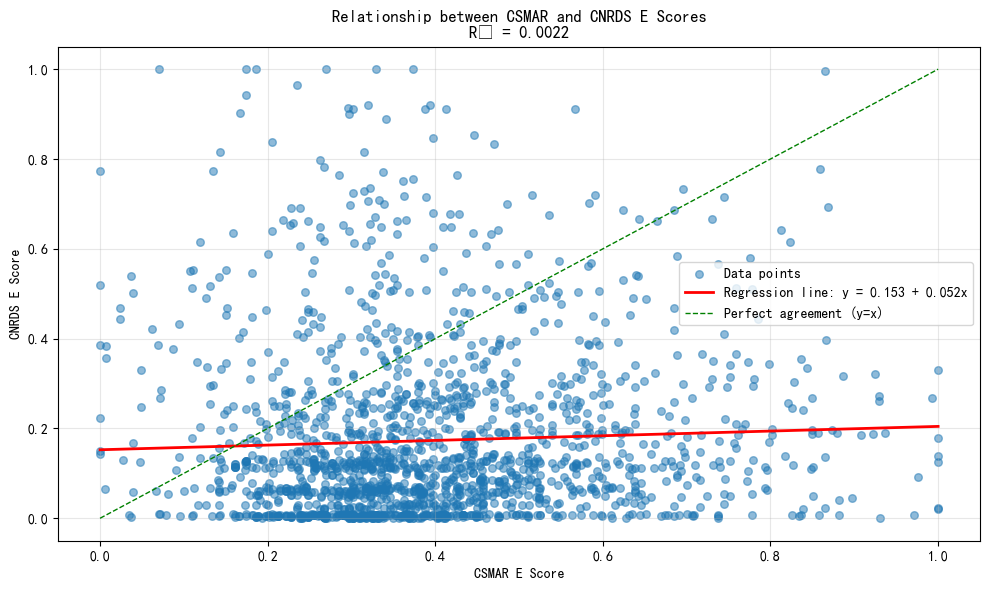

C:\Users\wanyi\AppData\Local\Temp\ipykernel_20800\3886132974.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Intercept': model.params[0],
C:\Users\wanyi\AppData\Local\Temp\ipykernel_20800\3886132974.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Slope': model.params[1],
C:\Users\wanyi\AppData\Local\Temp\ipykernel_20800\3886132974.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Slope_p_value': model.pvalues[1],



Regression Analysis for S Dimension
                            OLS Regression Results                            
Dep. Variable:             CNRDS_S_MM   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     13.10
Date:                Thu, 30 Oct 2025   Prob (F-statistic):           0.000303
Time:                        15:55:03   Log-Likelihood:                 421.94
No. Observations:                1783   AIC:                            -839.9
Df Residuals:                    1781   BIC:                            -828.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          

C:\Users\wanyi\AppData\Local\Temp\ipykernel_20800\3886132974.py:62: UserWarning: Glyph 178 (\N{SUPERSCRIPT TWO}) missing from current font.
  plt.tight_layout()
C:\Users\wanyi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 178 (\N{SUPERSCRIPT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


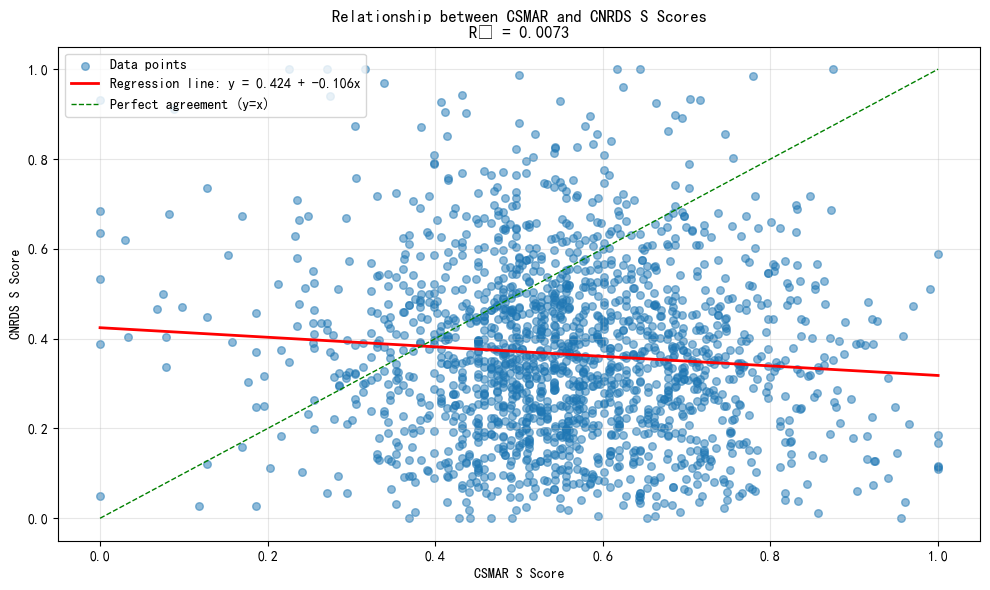


Regression Analysis for G Dimension
                            OLS Regression Results                            
Dep. Variable:             CNRDS_G_MM   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     15.08
Date:                Thu, 30 Oct 2025   Prob (F-statistic):           0.000107
Time:                        15:55:03   Log-Likelihood:                 644.46
No. Observations:                1783   AIC:                            -1285.
Df Residuals:                    1781   BIC:                            -1274.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          

C:\Users\wanyi\AppData\Local\Temp\ipykernel_20800\3886132974.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Intercept': model.params[0],
C:\Users\wanyi\AppData\Local\Temp\ipykernel_20800\3886132974.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Slope': model.params[1],
C:\Users\wanyi\AppData\Local\Temp\ipykernel_20800\3886132974.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Slope_p_value': model.pvalues[1],
C:\

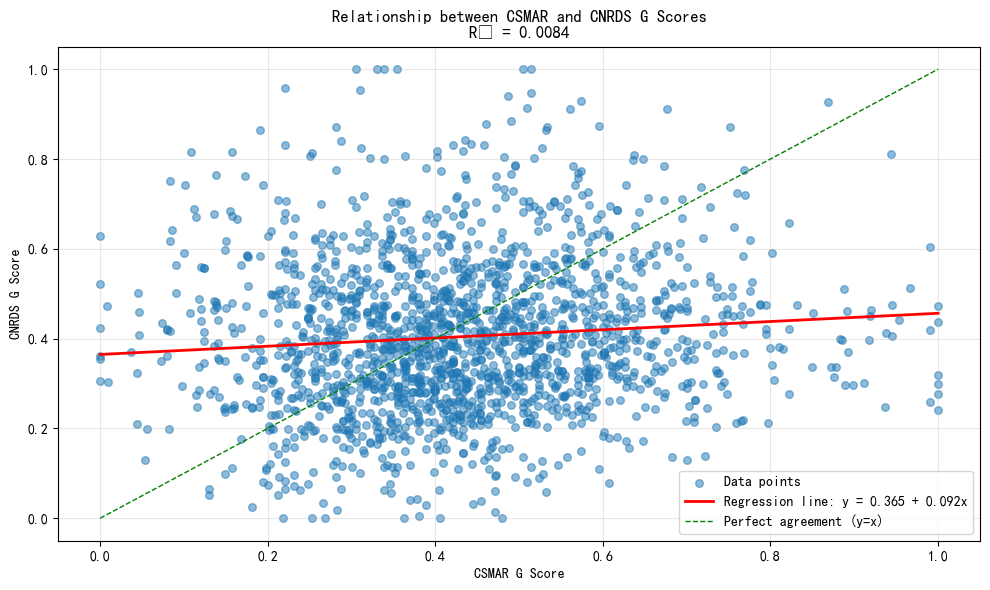


Regression Results Summary:
  Dimension  R_Squared   Slope  Intercept  Slope_p_value  N_Observations
0       ESG     0.0004  0.0189     0.3496         0.4029            1783
1         E     0.0022  0.0520     0.1526         0.0479            1783
2         S     0.0073 -0.1064     0.4243         0.0003            1783
3         G     0.0084  0.0917     0.3648         0.0001            1783


In [66]:
import statsmodels.api as sm
from sklearn.metrics import r2_score

# 为每个维度进行简单线性回归
regression_results = []

for dim in ['ESG', 'E', 'S', 'G']:
    print(f"\n{'='*50}")
    print(f"Regression Analysis for {dim} Dimension")
    print(f"{'='*50}")
    
    # 准备数据
    csmar_col = f'CSMAR_{dim}_MM'
    cnrds_col = f'CNRDS_{dim}_MM'
    
    # 移除缺失值
    regression_data = df[[csmar_col, cnrds_col]].dropna()
    X = regression_data[csmar_col]
    y = regression_data[cnrds_col]
    
    # 添加常数项
    X = sm.add_constant(X)
    
    # 执行OLS回归
    model = sm.OLS(y, X).fit()
    
    # 提取关键结果
    results = {
        'Dimension': dim,
        'R_Squared': model.rsquared,
        'Adj_R_Squared': model.rsquared_adj,
        'Intercept': model.params[0],
        'Slope': model.params[1],
        'Slope_p_value': model.pvalues[1],
        'N_Observations': len(regression_data)
    }
    regression_results.append(results)
    
    # 打印回归结果
    print(model.summary())
    
    # 创建散点图与回归线
    plt.figure(figsize=(10, 6))
    plt.scatter(regression_data[csmar_col], regression_data[cnrds_col], 
                alpha=0.5, s=30, label='Data points')
    
    # 添加回归线
    x_range = np.linspace(regression_data[csmar_col].min(), regression_data[csmar_col].max(), 100)
    y_pred = results['Intercept'] + results['Slope'] * x_range
    plt.plot(x_range, y_pred, color='red', linewidth=2, 
             label=f'Regression line: y = {results["Intercept"]:.3f} + {results["Slope"]:.3f}x')
    
    # 添加完美一致性线 (y=x)
    plt.plot(x_range, x_range, color='green', linestyle='--', 
             linewidth=1, label='Perfect agreement (y=x)')
    
    plt.xlabel(f'CSMAR {dim} Score')
    plt.ylabel(f'CNRDS {dim} Score')
    plt.title(f'Relationship between CSMAR and CNRDS {dim} Scores\nR² = {results["R_Squared"]:.4f}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# 创建回归结果汇总表
regression_df = pd.DataFrame(regression_results)
print("\nRegression Results Summary:")
print("="*60)
display_cols = ['Dimension', 'R_Squared', 'Slope', 'Intercept', 'Slope_p_value', 'N_Observations']
print(regression_df[display_cols].round(4))

**Key Regression Results Between CSMAR and CNRDS ESG Ratings:**

• **Extremely Low Explanatory Power**: All R² values < 1% (ESG: 0.04%, E: 0.22%, S: 0.73%, G: 0.84%)

• **Divergent Relationship Patterns**:
  - ESG: No significant relationship (slope=0.019, p=0.403)
  - E: Marginally positive (slope=0.052, p=0.048)
  - S: Significantly negative (slope=-0.106, p=0.0003)
  - G: Significantly positive (slope=0.092, p=0.0001)

• **Systematic Scoring Bias**: All intercepts significantly different from zero, indicating fundamental scaling differences

Critical Findings:

The regression analysis reveals that CSMAR and CNRDS ESG rating systems capture fundamentally different aspects of corporate sustainability performance. The near-zero R² values across all dimensions indicate negligible predictive relationship between the two systems. Most alarmingly, the significant negative relationship in social (S) ratings suggests the systems hold opposing views on corporate social responsibility. These results demonstrate that the choice of ESG rating provider substantially influences research outcomes and investment decisions, as the systems cannot be used interchangeably.


### Violin Plot

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 设置图形风格
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# 准备数据 - 创建长格式数据以便于绘图
violin_data = []

for dim in ['ESG', 'E', 'S', 'G']:
    csmar_col = f'CSMAR_{dim}_MM'
    cnrds_col = f'CNRDS_{dim}_MM'
    
    # 提取CSMAR数据
    for score in df[csmar_col].dropna():
        violin_data.append({
            'Dimension': dim,
            'System': 'CSMAR',
            'Score': score
        })
    
    # 提取CNRDS数据
    for score in df[cnrds_col].dropna():
        violin_data.append({
            'Dimension': dim,
            'System': 'CNRDS',
            'Score': score
        })

violin_df = pd.DataFrame(violin_data)

print("数据准备完成，开始绘制violin plot...")

数据准备完成，开始绘制violin plot...


Statistical Summary:
                    mean     std  median
Dimension System                        
E         CNRDS   0.1731  0.1926  0.1131
          CSMAR   0.3951  0.1734  0.3651
ESG       CNRDS   0.3578  0.1671  0.3250
          CSMAR   0.4304  0.1754  0.4088
G         CNRDS   0.4045  0.1693  0.3892
          CSMAR   0.4328  0.1693  0.4215
S         CNRDS   0.3649  0.1917  0.3508
          CSMAR   0.5588  0.1540  0.5508


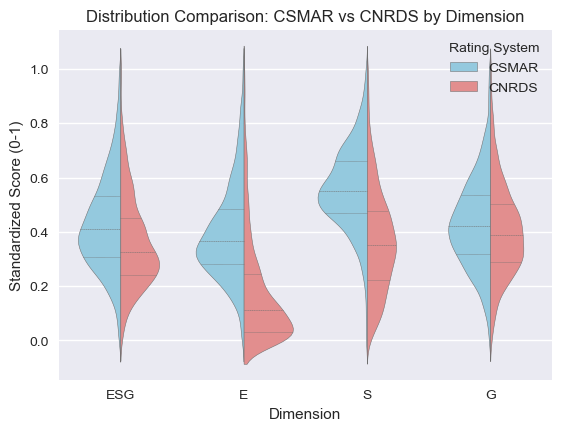

In [75]:
# 创建violin plot
plt.figure(figsize=(14, 10))

# 主图 - 按维度分组显示两个系统的分布
plt.subplot(2, 2, 1)
sns.violinplot(data=violin_df, x='Dimension', y='Score', hue='System', 
               split=True, inner='quart', palette={'CSMAR': 'skyblue', 'CNRDS': 'lightcoral'})
plt.title('Distribution Comparison: CSMAR vs CNRDS by Dimension')
plt.ylabel('Standardized Score (0-1)')
plt.legend(title='Rating System')

# 添加统计摘要
stats_summary = violin_df.groupby(['Dimension', 'System'])['Score'].agg(['mean', 'std', 'median']).round(4)
print("Statistical Summary:")
print(stats_summary)

C:\Users\wanyi\AppData\Local\Temp\ipykernel_20800\1226646664.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=dim_data, x='System', y='Score',
C:\Users\wanyi\AppData\Local\Temp\ipykernel_20800\1226646664.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=dim_data, x='System', y='Score',
C:\Users\wanyi\AppData\Local\Temp\ipykernel_20800\1226646664.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=dim_data, x='System', y='Score',
C:\Users\wanyi\AppData\Local\Temp\ipykernel_20800\1226646664.py:9: FutureWarning: 

P

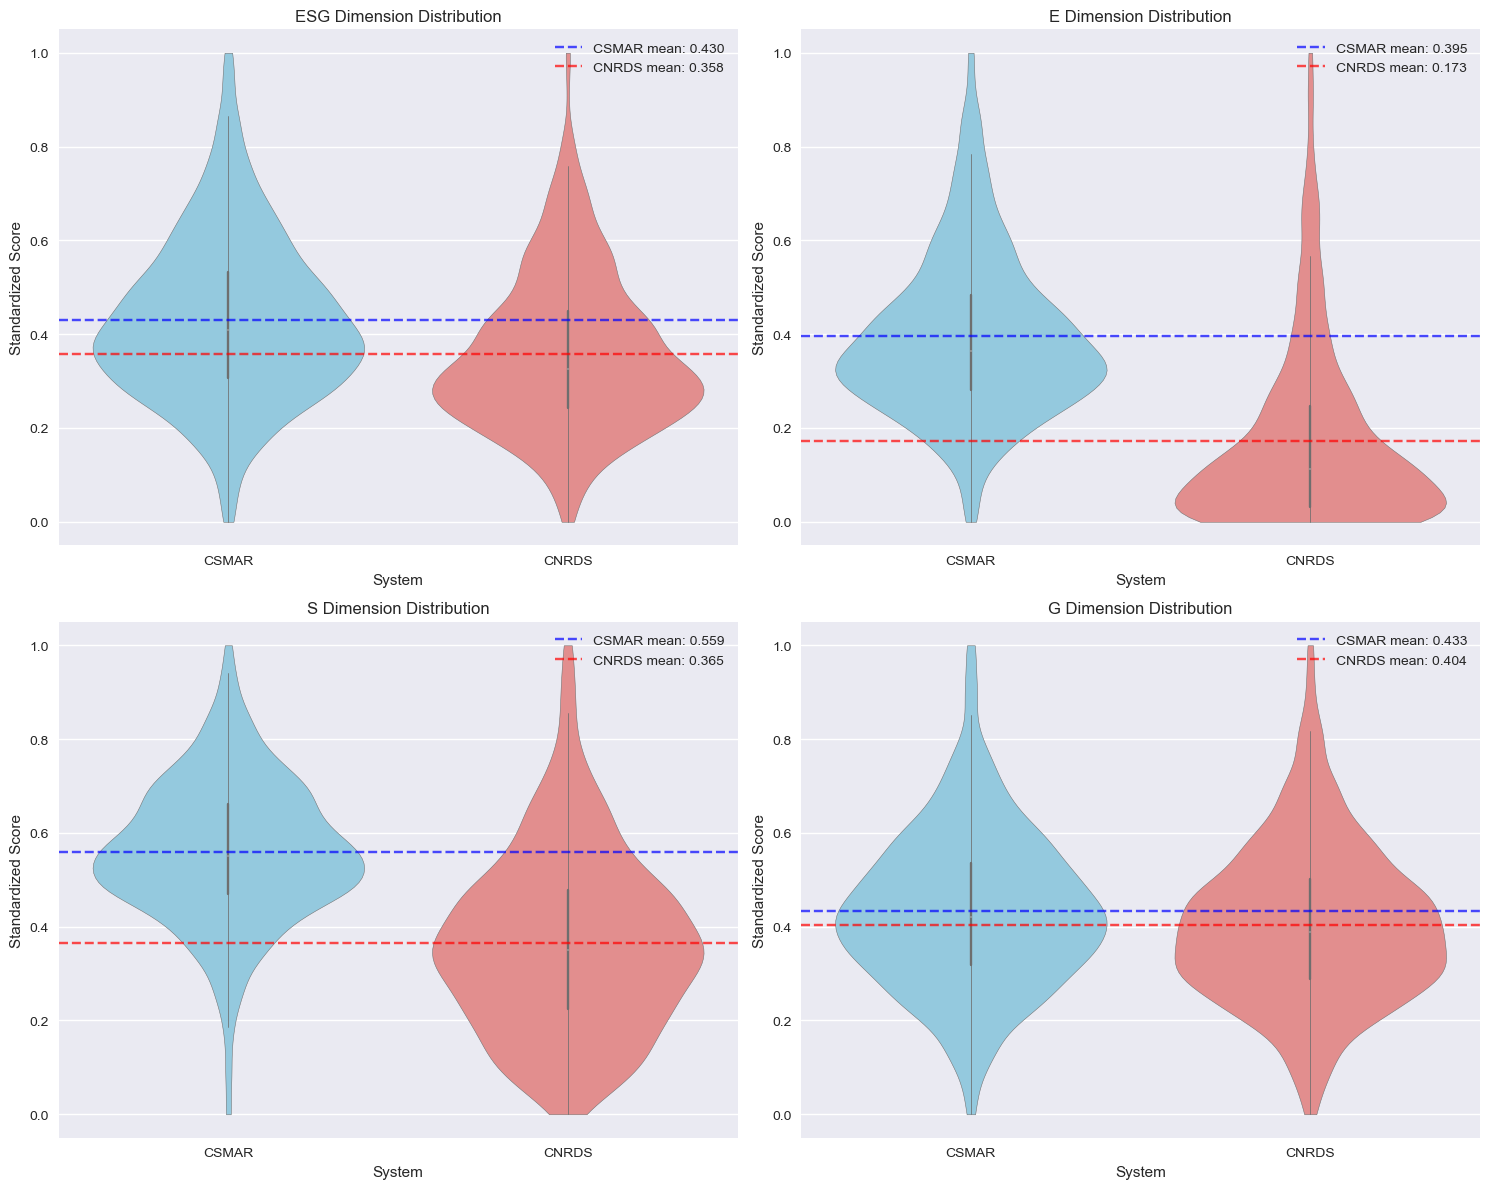

In [77]:
# 按维度分别绘制violin plot
dimensions = ['ESG', 'E', 'S', 'G']
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for i, dim in enumerate(dimensions):
    dim_data = violin_df[violin_df['Dimension'] == dim]
    
    sns.violinplot(data=dim_data, x='System', y='Score', 
                   ax=axes[i], palette={'CSMAR': 'skyblue', 'CNRDS': 'lightcoral'},
                   inner='box', cut=0)
    
    # 添加均值和标准差标注
    csmar_mean = dim_data[dim_data['System'] == 'CSMAR']['Score'].mean()
    cnrds_mean = dim_data[dim_data['System'] == 'CNRDS']['Score'].mean()
    
    axes[i].axhline(y=csmar_mean, color='blue', linestyle='--', alpha=0.7, label=f'CSMAR mean: {csmar_mean:.3f}')
    axes[i].axhline(y=cnrds_mean, color='red', linestyle='--', alpha=0.7, label=f'CNRDS mean: {cnrds_mean:.3f}')
    
    axes[i].set_title(f'{dim} Dimension Distribution')
    axes[i].set_ylabel('Standardized Score')
    axes[i].legend()

plt.tight_layout()
plt.show()

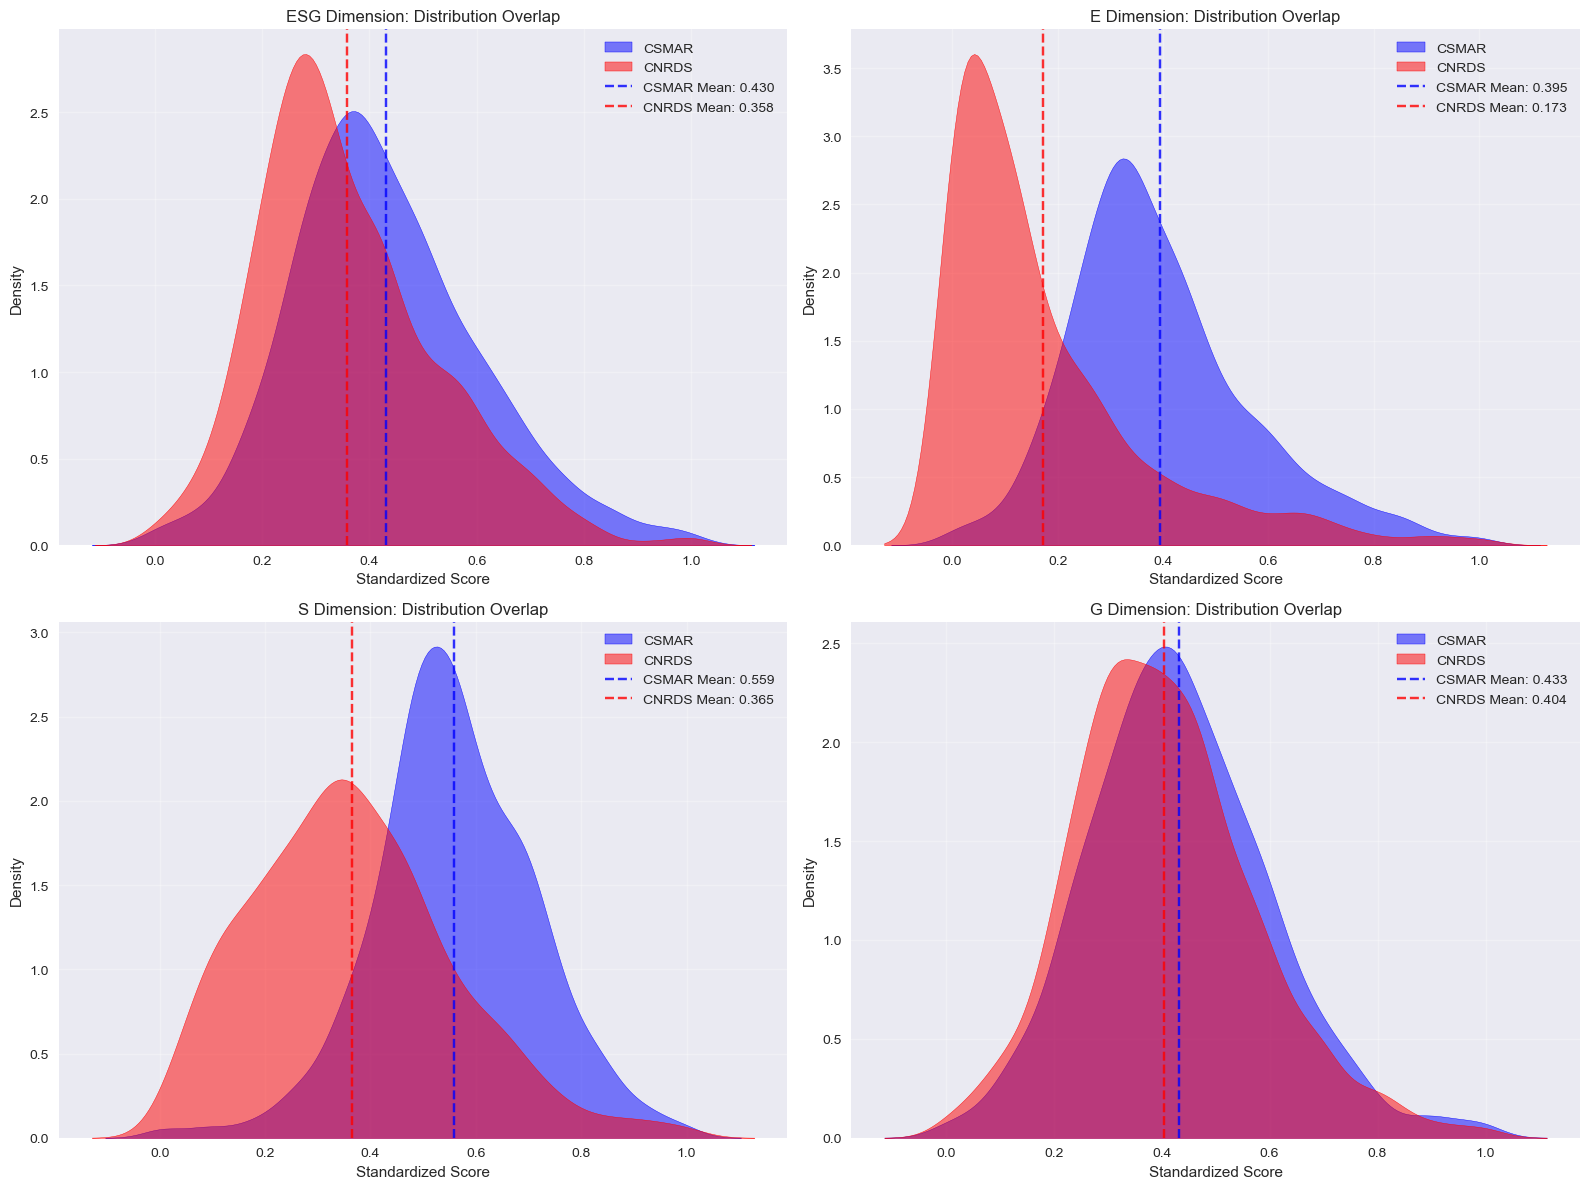

In [79]:
# 创建组合分布图显示重叠情况
plt.figure(figsize=(16, 12))

for i, dim in enumerate(dimensions, 1):
    plt.subplot(2, 2, i)
    
    # 提取两个系统的数据
    csmar_scores = df[f'CSMAR_{dim}_MM'].dropna()
    cnrds_scores = df[f'CNRDS_{dim}_MM'].dropna()
    
    # 绘制密度图
    sns.kdeplot(csmar_scores, label='CSMAR', fill=True, alpha=0.5, color='blue')
    sns.kdeplot(cnrds_scores, label='CNRDS', fill=True, alpha=0.5, color='red')
    
    # 添加均值和中位数线
    plt.axvline(csmar_scores.mean(), color='blue', linestyle='--', alpha=0.8, label=f'CSMAR Mean: {csmar_scores.mean():.3f}')
    plt.axvline(cnrds_scores.mean(), color='red', linestyle='--', alpha=0.8, label=f'CNRDS Mean: {cnrds_scores.mean():.3f}')
    
    plt.xlabel('Standardized Score')
    plt.ylabel('Density')
    plt.title(f'{dim} Dimension: Distribution Overlap')
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

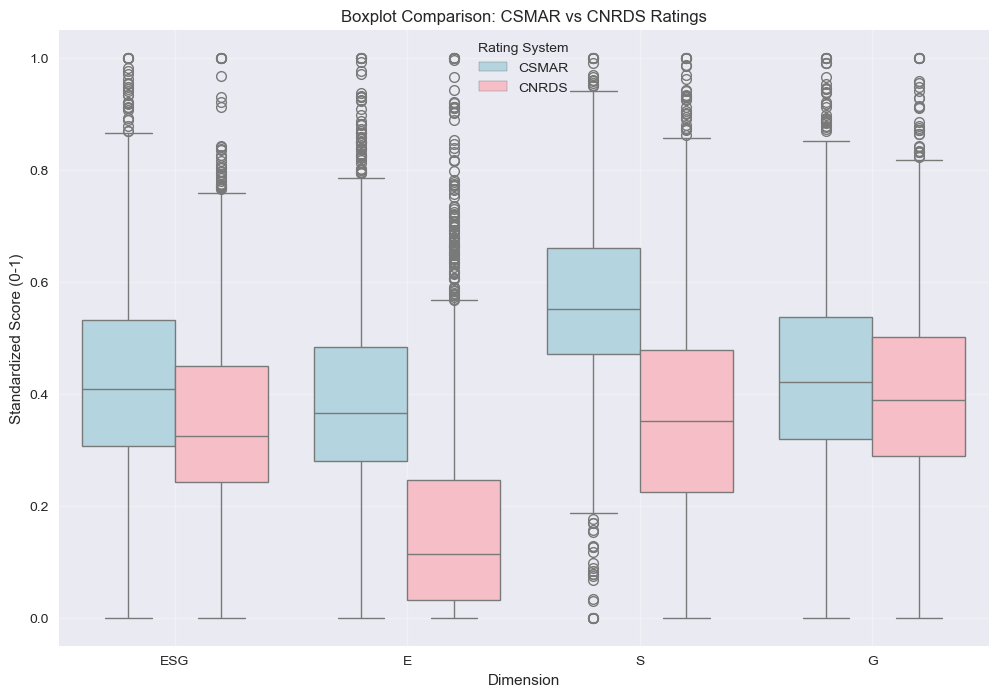

In [81]:
# 补充箱线图对比
plt.figure(figsize=(12, 8))
sns.boxplot(data=violin_df, x='Dimension', y='Score', hue='System', 
            palette={'CSMAR': 'lightblue', 'CNRDS': 'lightpink'})
plt.title('Boxplot Comparison: CSMAR vs CNRDS Ratings')
plt.ylabel('Standardized Score (0-1)')
plt.legend(title='Rating System')
plt.grid(True, alpha=0.3)
plt.show()

### Industry Level Analysis

Which industries are significantly different?   
alpha = 5%

In [86]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multitest import multipletests

# Set up Chinese font (if needed)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

print("Step 1: Identifying Industries with Significant Rating Differences")
print("=" * 70)

# Assuming your industry variable is 'Industry', please adjust according to actual situation
industry_col = 'CSMAR_Industry_1'  # Please replace with actual industry column name

# Check industry distribution
industry_counts = df[industry_col].value_counts()
print("Industry Distribution:")
print(industry_counts.head(10))  # Display top 10 industries

# Only keep industries with sufficient samples (e.g., at least 30 observations)
min_obs = 30
valid_industries = industry_counts[industry_counts >= min_obs].index
print(f"\nNumber of industries with sufficient samples: {len(valid_industries)}")

# Store industry difference test results
industry_results = []

for industry in valid_industries:
    industry_data = df[df[industry_col] == industry]
    
    industry_result = {'Industry': industry, 'N': len(industry_data)}
    
    for dim in ['ESG', 'E', 'S', 'G']:
        csmar_col = f'CSMAR_{dim}_MM'
        cnrds_col = f'CNRDS_{dim}_MM'
        
        # Extract data
        csmar_scores = industry_data[csmar_col].dropna()
        cnrds_scores = industry_data[cnrds_col].dropna()
        
        # Find common index
        common_idx = csmar_scores.index.intersection(cnrds_scores.index)
        if len(common_idx) < 10:  # Skip if too few samples
            continue
            
        csmar_common = csmar_scores.loc[common_idx]
        cnrds_common = cnrds_scores.loc[common_idx]
        
        # Paired t-test
        t_stat, p_value = stats.ttest_rel(csmar_common, cnrds_common)
        mean_diff = csmar_common.mean() - cnrds_common.mean()
        
        industry_result[f'{dim}_Mean_Diff'] = mean_diff
        industry_result[f'{dim}_P_Value'] = p_value
        industry_result[f'{dim}_Significant'] = p_value < 0.05
    
    industry_results.append(industry_result)

# Convert to DataFrame
industry_df = pd.DataFrame(industry_results)

# Multiple testing correction
p_values = []
for dim in ['ESG', 'E', 'S', 'G']:
    p_values.extend(industry_df[f'{dim}_P_Value'].dropna().tolist())

# Apply FDR correction
reject, pvals_corrected, _, _ = multipletests(p_values, alpha=0.05, method='fdr_bh')

# Assign corrected p-values back to DataFrame
corrected_idx = 0
for dim in ['ESG', 'E', 'S', 'G']:
    for i in industry_df.index:
        if not pd.isna(industry_df.loc[i, f'{dim}_P_Value']):
            industry_df.loc[i, f'{dim}_P_Value_Corrected'] = pvals_corrected[corrected_idx]
            industry_df.loc[i, f'{dim}_Significant_Corrected'] = pvals_corrected[corrected_idx] < 0.05
            corrected_idx += 1

print("\nIndustry Difference Test Results (Top 10 Industries):")
display_cols = ['Industry', 'N'] + [f'{dim}_Mean_Diff' for dim in ['ESG', 'E', 'S', 'G']]
print(industry_df[display_cols].head(10).round(4))

# Identify industries with significant differences
significant_industries = set()
for dim in ['ESG', 'E', 'S', 'G']:
    sig_industries = industry_df[industry_df[f'{dim}_Significant_Corrected'] == True]['Industry'].tolist()
    significant_industries.update(sig_industries)
    print(f"\n{dim} Dimension - Industries with Significant Differences ({len(sig_industries)}):")
    for industry in sig_industries:
        mean_diff = industry_df[industry_df['Industry'] == industry][f'{dim}_Mean_Diff'].values[0]
        print(f"  {industry}: Difference = {mean_diff:.4f}")

print(f"\nTotal number of industries with significant differences: {len(significant_industries)}")

Step 1: Identifying Industries with Significant Rating Differences
Industry Distribution:
CSMAR_Industry_1
Manufacturing                                   593
Finance Industry                                325
Raw Materials Manufacturing                     166
Other Services                                  123
Software and Information Technology Services    118
Transportation, Storage and Postal Services      97
Real Estate                                      92
Mining Industry                                  85
Construction                                     74
Water Production and Supply                      65
Name: count, dtype: int64

Number of industries with sufficient samples: 10

Industry Difference Test Results (Top 10 Industries):
                                       Industry    N  ESG_Mean_Diff  \
0                                 Manufacturing  593         0.0549   
1                              Finance Industry  325         0.1749   
2                   Raw Mater

In [92]:
print("\nStep 2: In-depth Analysis of Industries with Significant Differences")
print("=" * 70)

# Detailed analysis for each industry with significant differences
for industry in significant_industries:
    print(f"\n{'='*50}")
    print(f"Industry Deep Dive: {industry}")
    print(f"{'='*50}")
    
    industry_data = df[df[industry_col] == industry]
    
    # Basic statistics
    print(f"Sample Size: {len(industry_data)}")
    
    # Dimension-wise difference analysis
    dimension_analysis = []
    for dim in ['ESG', 'E', 'S', 'G']:
        csmar_col = f'CSMAR_{dim}_MM'
        cnrds_col = f'CNRDS_{dim}_MM'
        
        csmar_scores = industry_data[csmar_col].dropna()
        cnrds_scores = industry_data[cnrds_col].dropna()
        
        common_idx = csmar_scores.index.intersection(cnrds_scores.index)
        csmar_common = csmar_scores.loc[common_idx]
        cnrds_common = cnrds_scores.loc[common_idx]
        
        if len(common_idx) < 5:
            continue
            
        mean_diff = csmar_common.mean() - cnrds_common.mean()
        relative_bias = mean_diff / ((csmar_common.mean() + cnrds_common.mean()) / 2) * 100
        
        # Calculate agreement metric
        agreement_5bin = (pd.cut(csmar_common, 5, labels=False) == pd.cut(cnrds_common, 5, labels=False)).mean()
        
        dimension_analysis.append({
            'Dimension': dim,
            'CSMAR_Mean': csmar_common.mean(),
            'CNRDS_Mean': cnrds_common.mean(),
            'Mean_Difference': mean_diff,
            'Relative_Bias_Percent': relative_bias,
            'Agreement_5bin': agreement_5bin,
            'Significant': industry_df[
                (industry_df['Industry'] == industry) & 
                (~industry_df[f'{dim}_Significant_Corrected'].isna())
            ][f'{dim}_Significant_Corrected'].iloc[0] if not industry_df[
                (industry_df['Industry'] == industry) & 
                (~industry_df[f'{dim}_Significant_Corrected'].isna())
            ].empty else False
        })
    
    analysis_df = pd.DataFrame(dimension_analysis)
    
    # Print analysis results
    print("\nDimension Comparison:")
    for _, row in analysis_df.iterrows():
        sig_flag = "***" if row['Significant'] else ""
        bias_direction = "CSMAR Higher" if row['Mean_Difference'] > 0 else "CNRDS Higher"
        print(f"  {row['Dimension']}: Difference={row['Mean_Difference']:.4f} ({bias_direction}), "
              f"Relative Bias={row['Relative_Bias_Percent']:.1f}%, Agreement={row['Agreement_5bin']:.3f}{sig_flag}")
    
    # Identify main difference patterns
    significant_dims = analysis_df[analysis_df['Significant']]
    if len(significant_dims) > 0:
        max_diff_dim = significant_dims.loc[significant_dims['Mean_Difference'].abs().idxmax()]
        print(f"\nLargest Difference Dimension: {max_diff_dim['Dimension']} "
              f"(Difference={max_diff_dim['Mean_Difference']:.4f}, Relative Bias={max_diff_dim['Relative_Bias_Percent']:.1f}%)")


Step 2: In-depth Analysis of Industries with Significant Differences

Industry Deep Dive: Raw Materials Manufacturing
Sample Size: 166

Dimension Comparison:
  ESG: Difference=-0.0123 (CNRDS Higher), Relative Bias=-3.0%, Agreement=0.283
  E: Difference=0.0276 (CSMAR Higher), Relative Bias=7.1%, Agreement=0.253
  S: Difference=0.2259 (CSMAR Higher), Relative Bias=53.0%, Agreement=0.193***
  G: Difference=0.0794 (CSMAR Higher), Relative Bias=22.2%, Agreement=0.386***

Largest Difference Dimension: S (Difference=0.2259, Relative Bias=53.0%)

Industry Deep Dive: Real Estate
Sample Size: 92

Dimension Comparison:
  ESG: Difference=0.0074 (CSMAR Higher), Relative Bias=2.3%, Agreement=0.250
  E: Difference=0.3150 (CSMAR Higher), Relative Bias=159.9%, Agreement=0.196***
  S: Difference=0.1241 (CSMAR Higher), Relative Bias=33.8%, Agreement=0.141***
  G: Difference=-0.1817 (CNRDS Higher), Relative Bias=-38.7%, Agreement=0.196***

Largest Difference Dimension: E (Difference=0.3150, Relative Bias


创建行业差异可视化...


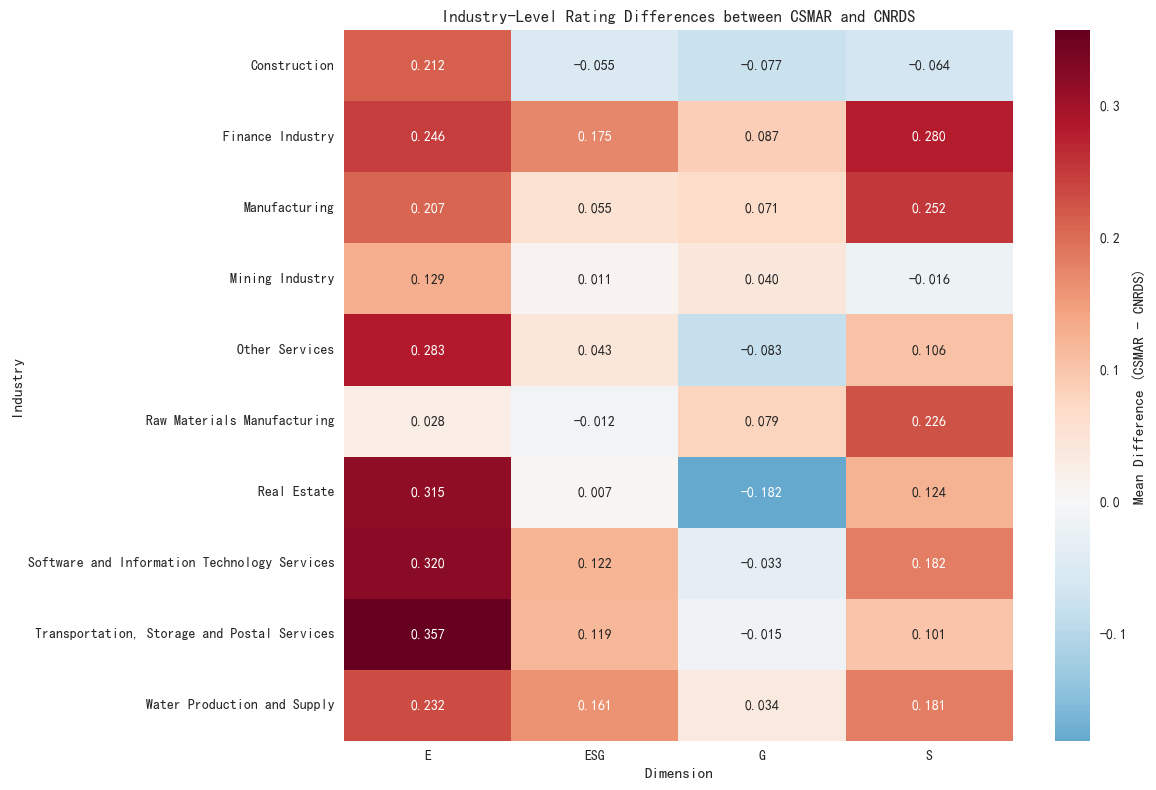


Industry Level Difference Visualization:
Industry
Finance Industry                                0.1969
Software and Information Technology Services    0.1643
Real Estate                                     0.1570
Water Production and Supply                     0.1518
Transportation, Storage and Postal Services     0.1480
Manufacturing                                   0.1461
Other Services                                  0.1290
Construction                                    0.1020
Raw Materials Manufacturing                     0.0863
Mining Industry                                 0.0488
dtype: float64


In [96]:
# 创建行业差异热图
print("\n创建行业差异可视化...")

# 准备热图数据
heatmap_data = []
for industry in significant_industries:
    for dim in ['ESG', 'E', 'S', 'G']:
        industry_row = industry_df[industry_df['Industry'] == industry]
        if len(industry_row) > 0 and not industry_row[f'{dim}_Mean_Diff'].isna().iloc[0]:
            mean_diff = industry_row[f'{dim}_Mean_Diff'].iloc[0]
            significant = industry_row[f'{dim}_Significant_Corrected'].iloc[0] if not industry_row[f'{dim}_Significant_Corrected'].isna().iloc[0] else False
            
            heatmap_data.append({
                'Industry': industry,
                'Dimension': dim,
                'Mean_Difference': mean_diff,
                'Significant': significant
            })

heatmap_df = pd.DataFrame(heatmap_data)

if len(heatmap_df) > 0:
    # 创建热图
    pivot_table = heatmap_df.pivot(index='Industry', columns='Dimension', values='Mean_Difference')
    
    plt.figure(figsize=(12, 8))
    
    # 创建显著性标记
    significance_table = heatmap_df.pivot(index='Industry', columns='Dimension', values='Significant')
    
    # 绘制热图
    mask = pivot_table.isnull()
    sns.heatmap(pivot_table, annot=True, cmap='RdBu_r', center=0, 
                fmt='.3f', cbar_kws={'label': 'Mean Difference (CSMAR - CNRDS)'},
                mask=mask)
    
    plt.title('Industry-Level Rating Differences between CSMAR and CNRDS')
    plt.tight_layout()
    plt.show()
    
    # 创建行业差异排名
    print("\nIndustry Level Difference Visualization:")
    industry_avg_diff = pivot_table.abs().mean(axis=1).sort_values(ascending=False)
    print(industry_avg_diff.head(10).round(4))

### Difference Without Standardization

In [84]:
# 确保数值列是数值型
for col in ["ESG_CNRDS", "E_CNRDS", "S_CNRDS", "G_CNRDS",
            "ESG_CSMAR", "E_CSMAR", "S_CSMAR", "G_CSMAR"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# --- 分组：按年份和一级行业 (CSRC_Industry) ---
grouped = (
    df.groupby(["Year", "CSRC_Industry"], as_index=False)
      .agg({
          "ESG_CNRDS": "mean",
          "E_CNRDS": "mean",
          "S_CNRDS": "mean",
          "G_CNRDS": "mean",
          "ESG_CSMAR": "mean",
          "E_CSMAR": "mean",
          "S_CSMAR": "mean",
          "G_CSMAR": "mean"
      })
)

# --- 美化列名 ---
grouped = grouped.rename(columns={
    "ESG_CNRDS": "CNRDS_ESG",
    "E_CNRDS": "CNRDS_E",
    "S_CNRDS": "CNRDS_S",
    "G_CNRDS": "CNRDS_G",
    "ESG_CSMAR": "CSMAR_ESG",
    "E_CSMAR": "CSMAR_E",
    "S_CSMAR": "CSMAR_S",
    "G_CSMAR": "CSMAR_G"
})

# 排序（按Year和行业名称）
grouped = grouped.sort_values(["Year", "CSRC_Industry"]).reset_index(drop=True)

# 显示前几行结果
print(grouped.head(10))


0  Year                                      CSRC_Industry  CNRDS_ESG  \
0  2015                                        Agriculture  48.062500   
1  2015                                      Air Transport  47.104167   
2  2015                                  Business Services  46.031250   
3  2015                            Capital Market Services  46.363095   
4  2015                     Civil Engineering Construction  45.802083   
5  2015                            Coal Mining and Washing  46.541667   
6  2015                                      Comprehensive  42.833333   
7  2015                                       Construction  45.062500   
8  2015                                   Culture and Arts  44.500000   
9  2015  Ecological Protection and Environmental Govern...  46.625000   

0    CNRDS_E    CNRDS_S    CNRDS_G  CSMAR_ESG    CSMAR_E    CSMAR_S    CSMAR_G  
0  17.125000  17.062500  13.875000  21.596350   3.381900  25.545900  35.295900  
1  19.250000  15.729167  12.125000

C:\Users\wanyi\AppData\Local\Temp\ipykernel_2344\1672844595.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors="coerce")


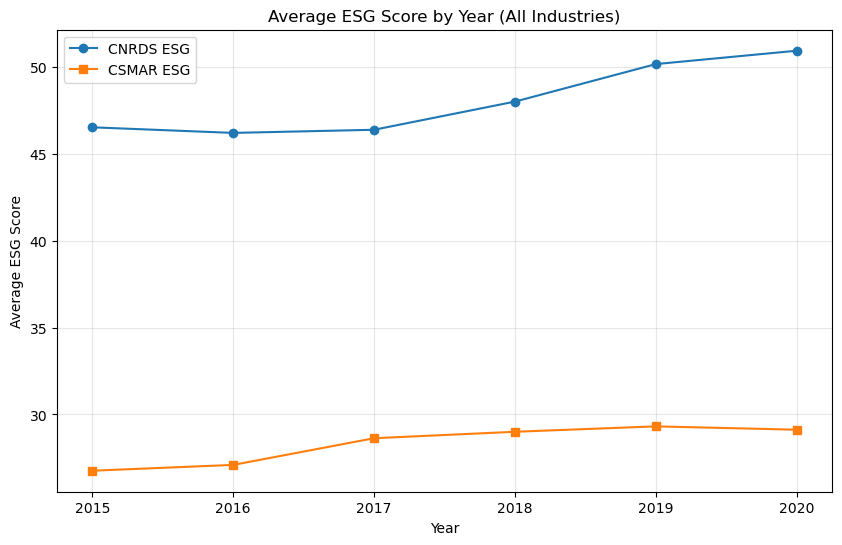

In [86]:
import matplotlib.pyplot as plt

# ============ 基础准备 ============
# 按年份取两个系统的整体平均值
overall_trend = grouped.groupby("Year")[["CNRDS_ESG", "CSMAR_ESG"]].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(overall_trend["Year"], overall_trend["CNRDS_ESG"], marker='o', label="CNRDS ESG")
plt.plot(overall_trend["Year"], overall_trend["CSMAR_ESG"], marker='s', label="CSMAR ESG")
plt.title("Average ESG Score by Year (All Industries)")
plt.xlabel("Year")
plt.ylabel("Average ESG Score")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


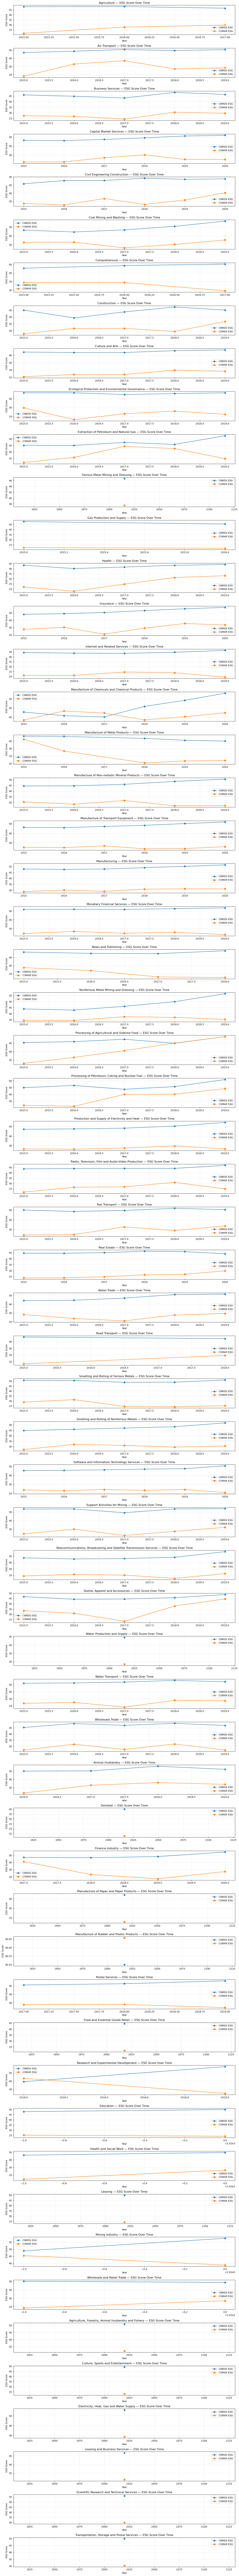

In [88]:
import matplotlib.pyplot as plt

industries = grouped["CSRC_Industry"].unique()
n = len(industries)

plt.figure(figsize=(14, n * 2.5))
for i, industry in enumerate(industries, 1):
    subset = grouped[grouped["CSRC_Industry"] == industry]
    plt.subplot(n, 1, i)
    plt.plot(subset["Year"], subset["CNRDS_ESG"], marker='o', label="CNRDS ESG", color="tab:blue")
    plt.plot(subset["Year"], subset["CSMAR_ESG"], marker='s', label="CSMAR ESG", color="tab:orange")
    plt.title(f"{industry} — ESG Score Over Time")
    plt.xlabel("Year")
    plt.ylabel("ESG Score")
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


C:\Users\wanyi\AppData\Local\Temp\ipykernel_2344\3907164290.py:32: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


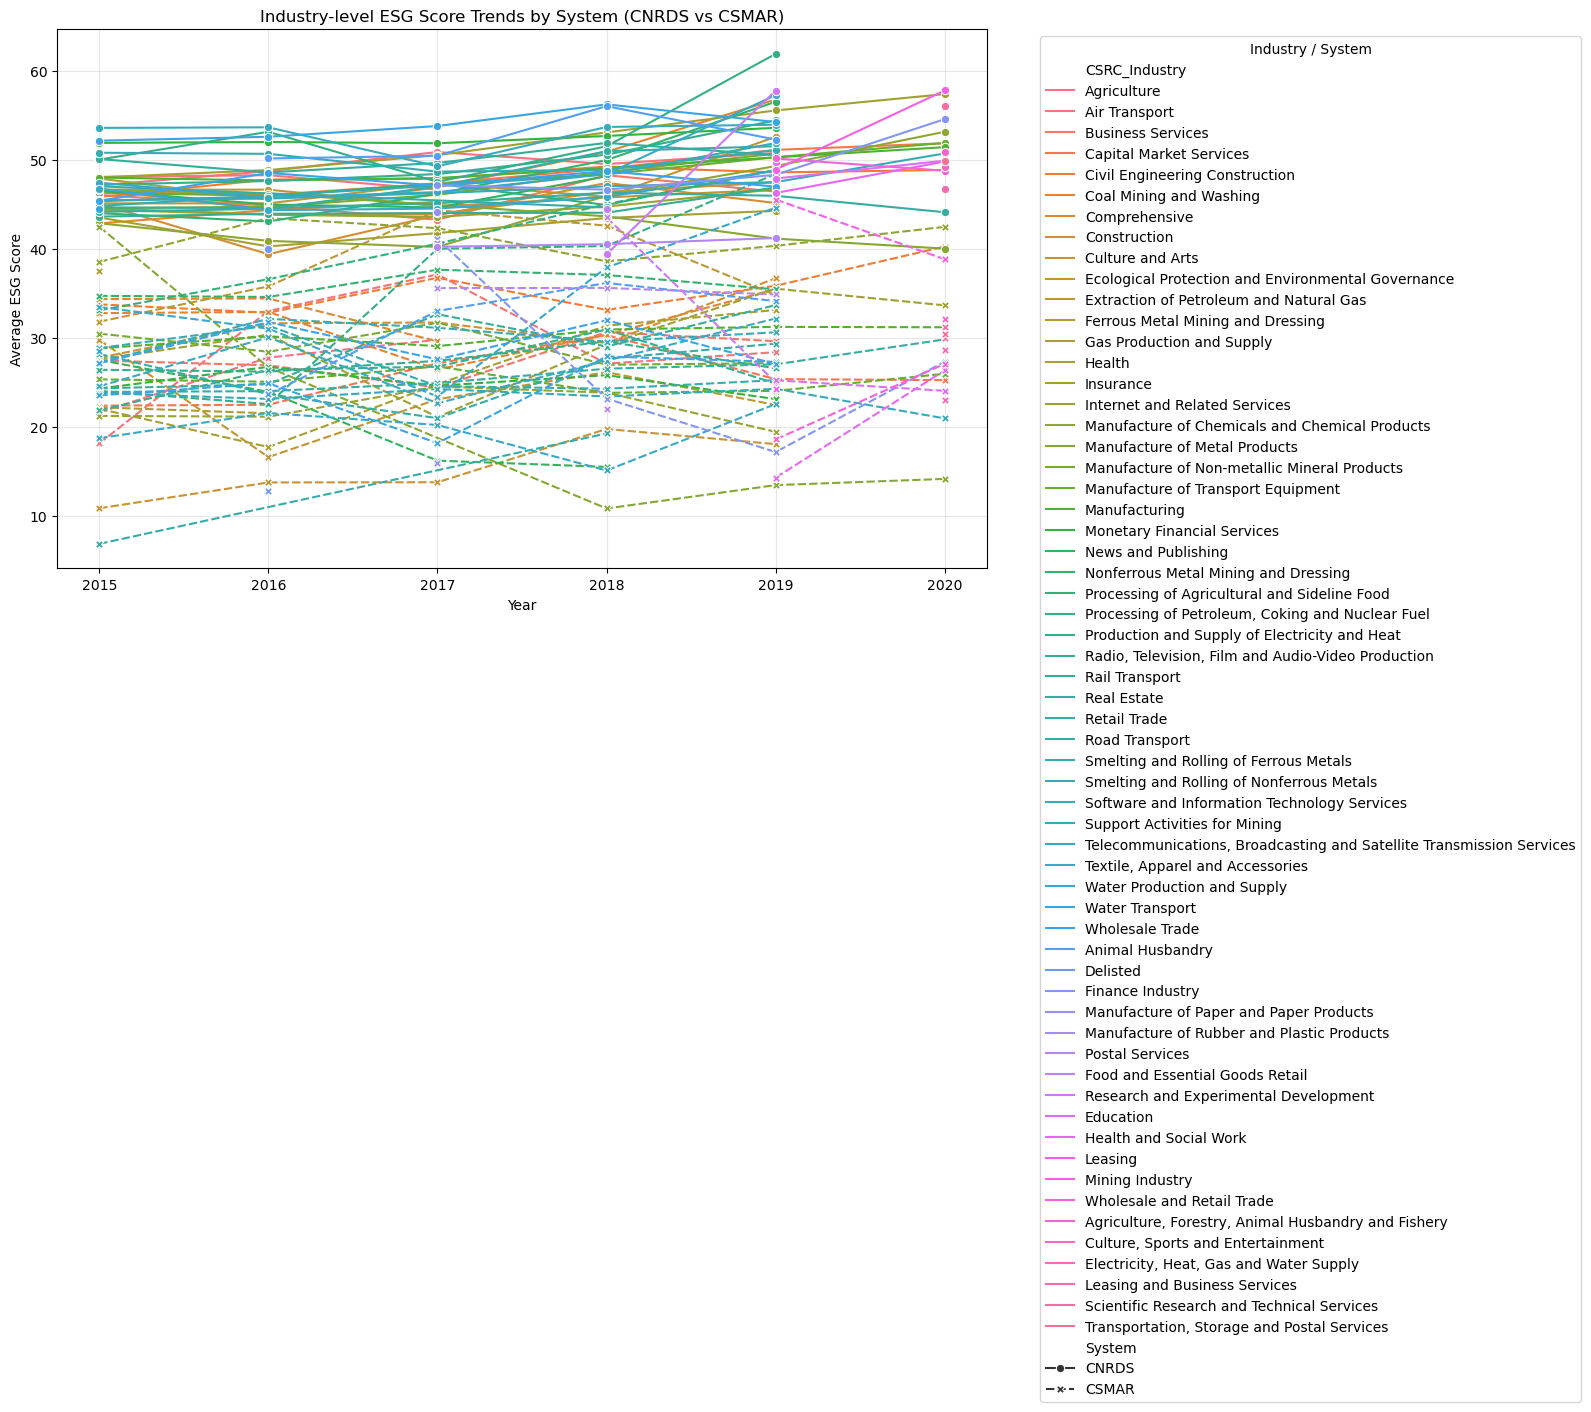

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

# 整理数据到“长格式”，方便 seaborn 画图
plot_df = grouped.melt(
    id_vars=["Year", "CSRC_Industry"],
    value_vars=["CNRDS_ESG", "CSMAR_ESG"],
    var_name="System",
    value_name="ESG_Score"
)

# 系统名更清晰一点
plot_df["System"] = plot_df["System"].replace({
    "CNRDS_ESG": "CNRDS",
    "CSMAR_ESG": "CSMAR"
})

plt.figure(figsize=(12, 7))
sns.lineplot(
    data=plot_df,
    x="Year", y="ESG_Score",
    hue="CSRC_Industry",  # 不同行业不同颜色
    style="System",       # 两个系统不同线型
    markers=True, dashes=True
)

plt.title("Industry-level ESG Score Trends by System (CNRDS vs CSMAR)")
plt.xlabel("Year")
plt.ylabel("Average ESG Score")
plt.legend(title="Industry / System", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


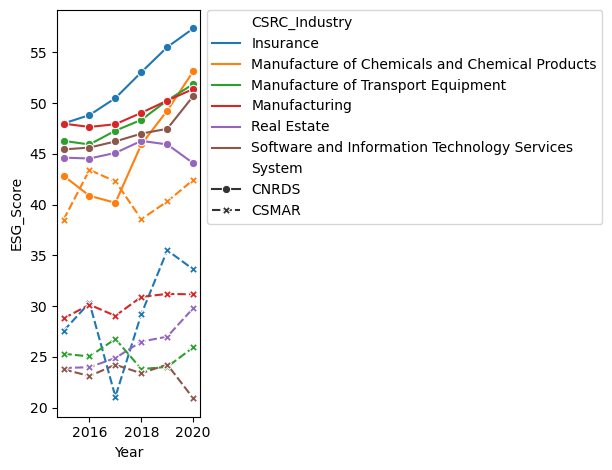

In [96]:
top_industries = grouped["CSRC_Industry"].value_counts().head(6).index
plot_df_subset = plot_df[plot_df["CSRC_Industry"].isin(top_industries)]

sns.lineplot(
    data=plot_df_subset,
    x="Year", y="ESG_Score",
    hue="CSRC_Industry", style="System", markers=True, dashes=True
)

# 将图例移到图表外部右上角
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()  # 自动调整布局，为图例留出空间
plt.show()


Top 5 industries (by CNRDS ESG mean):
Index(['Scientific Research and Technical Services',
       'Electricity, Heat, Gas and Water Supply', 'Water Transport',
       'Mining Industry', 'Support Activities for Mining'],
      dtype='object', name='CSRC_Industry')


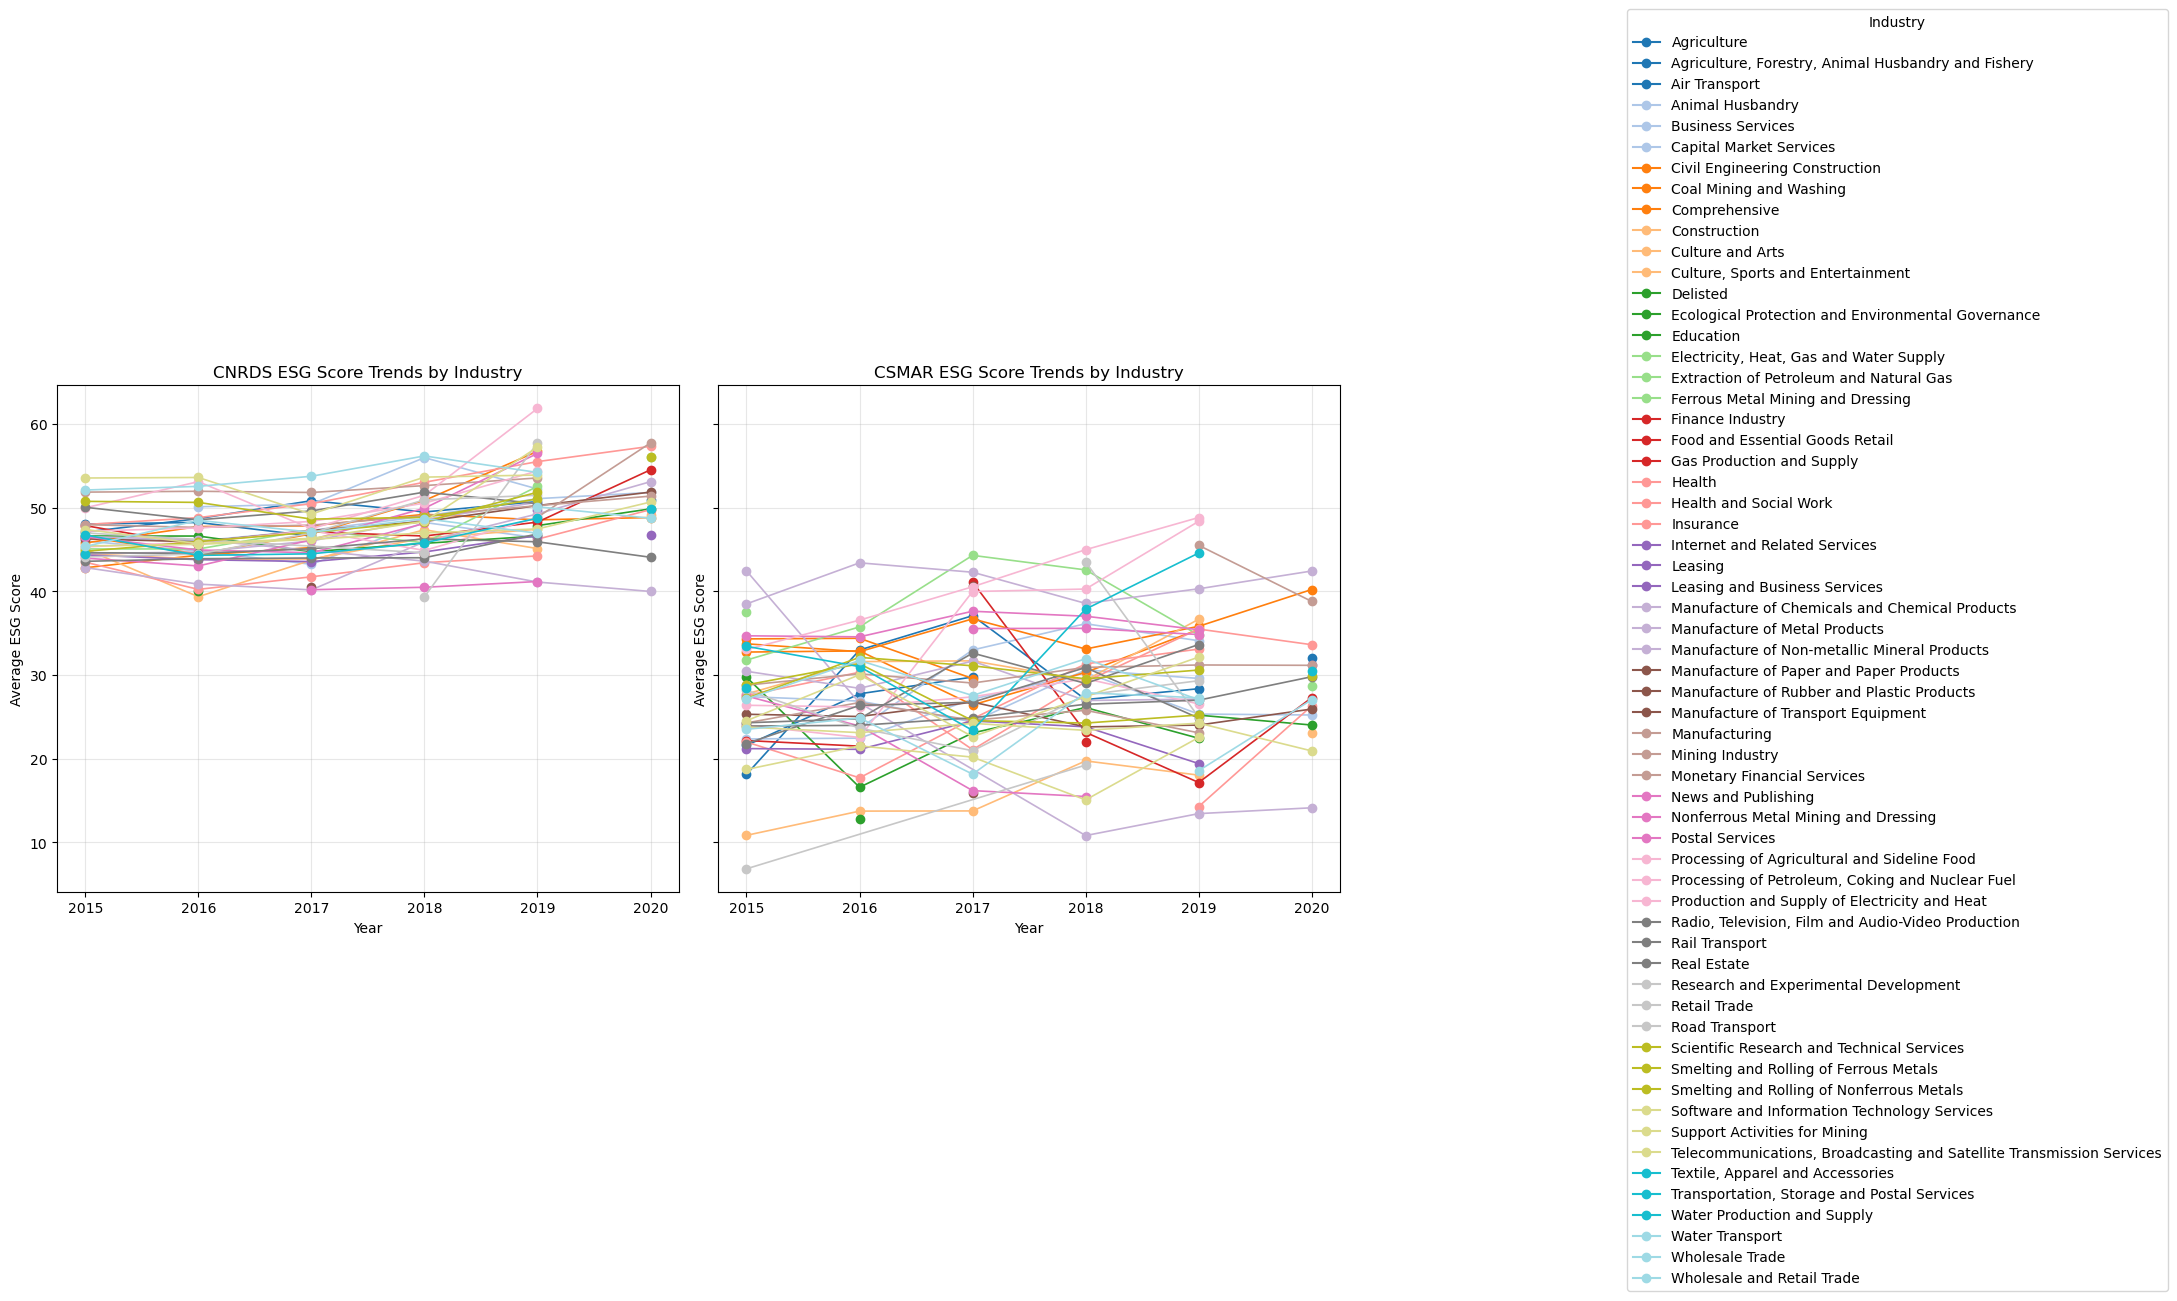

In [100]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.lines as mlines

top5 = (
    grouped.groupby("CSRC_Industry")["CNRDS_ESG"]
    .mean()
    .sort_values(ascending=False)
    .head(5)
    .index
)
print("Top 5 industries (by CNRDS ESG mean):")
print(top5)

industries = sorted(top5)


# grouped: columns ["Year","CSRC_Industry","CNRDS_ESG","CSMAR_ESG"]

# 统一的行业颜色映射（两个图共用）
industries = sorted(grouped["CSRC_Industry"].unique())
cmap = plt.get_cmap("tab20", len(industries))
color_map = {ind: cmap(i) for i, ind in enumerate(industries)}

# 画两个独立图（共享y轴），只保留一个总图例放在右侧，不遮挡图面
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

for ind in industries:
    sub = grouped[grouped["CSRC_Industry"] == ind].sort_values("Year")
    color = color_map[ind]
    axes[0].plot(sub["Year"], sub["CNRDS_ESG"], marker="o", linewidth=1.2, color=color)
    axes[1].plot(sub["Year"], sub["CSMAR_ESG"], marker="o", linewidth=1.2, color=color)

# 左：CNRDS；右：CSMAR
axes[0].set_title("CNRDS ESG Score Trends by Industry")
axes[1].set_title("CSMAR ESG Score Trends by Industry")
for ax in axes:
    ax.set_xlabel("Year")
    ax.set_ylabel("Average ESG Score")
    ax.grid(alpha=0.3)

# 只生成一个行业颜色图例，放到右侧
legend_handles = [mlines.Line2D([], [], color=color_map[ind], marker="o", linestyle="-", label=ind)
                  for ind in industries]
fig.legend(legend_handles, [h.get_label() for h in legend_handles],
           title="Industry", bbox_to_anchor=(1.02, 0.5), loc="center left", borderaxespad=0.)

plt.tight_layout(rect=[0, 0, 0.85, 1])  # 右侧留空给图例
plt.show()
